In [2]:
import numpy as np
from src.xpr_feature_reshaping import norm
from src.xpr_plot import show_hist
from src.xpr_plot import show_feature_label
from src.xpr_plot import *

# Load the datasets
path_app = "src"
dataset0 = np.loadtxt("./%s/data_historical/Code_Red_I.csv" % path_app, delimiter=",")
dataset1 = np.loadtxt("./%s/data_historical/Nimda.csv" % path_app, delimiter=",")
dataset2 = np.loadtxt("./%s/data_historical/Slammer.csv" % path_app, delimiter=",")
dataset3 = np.loadtxt("./%s/data_historical/Moscow_blackout.csv" % path_app, delimiter=",")
dataset4 = np.loadtxt("./%s/data_historical/WannaCrypt.csv" % path_app, delimiter=",")
dataset5 = np.loadtxt("./%s/data_historical/RIPE_regular.csv" % path_app, delimiter=",")
dataset6 = np.loadtxt("./%s/data_historical/BCNET_regular.csv" % path_app, delimiter=",")
datasets = {"Code_Red_I": dataset0, "Nimda": dataset1, "Slammer": dataset2, "Moscow_blackout": dataset3, "WannaCrypt": dataset4, "RIPE_regular": dataset5, "BCNET_regular": dataset6}

def preprocess( dataset, div = 1 ):
    row_index_end = dataset.shape[0] - dataset.shape[0] % div  # divisible by div, but What is div for?
    data_x = dataset[:row_index_end, 4:-1]

    data_y = dataset[:row_index_end, -1]
    # Change training labels
    inds1 = np.where(data_y == -1)
    data_y[inds1] = 2
    return data_x,data_y

def getFeatures( dataset ):
    X, y = preprocess(dataset)
    return X, y 

def getProcessedFeatures( X, y, scalerType = "Std" ):
    Xp, yp = norm(X, y, scalerType)
    return Xp, yp

def showFeatureHist( X ):
    for i in range( X.shape[1]  ):
        show_hist( X[:, i], "feature" + str(i))


def compareFeatureHist(X, Xp, i ):
    show_hist(X[:,i], "feature "+ str(i))
    show_hist(Xp[:,i], "Processed feature "+ str(i))

def compareFeatureBaseScalers(X):
    # columns = [0, 4, 13]
    columns = [x for x in range(X.shape[1])]
    Xstd, y1= norm(X, None, "Std")
    Xpower, y2 = norm(X, None, "Power")
    Xrobust, y3 = norm(X, None, "Robust")

    for i in columns:
        fig, (sub1, sub2, sub3, sub4) = plt.subplots(1,4, figsize=(15,5))
        fig.suptitle(f"Feature %d: %s" % (i+1, feature_name(i+1)))
        show_hist(X[:,i], "Original ", sub1, fig )
        show_hist(Xstd[:,i], "Std ",  sub2, fig )
        show_hist(Xpower[:,i], "Power " ,  sub3, fig)
        show_hist(Xrobust[:,i], "Robust ",  sub4, fig)
        plt.show()


# 1. Compare different feature scaler methods

From the histogram of the features, we could see that there are three types of features distribution:
[0-3, 7-9, 11, 33-36]: there features are skewed with High frequency when near zero, and low frequency when big number. The PowerScaler would be a good choice.
[4-6, 10,12] there features are like normal distribution. The StandardScaler would be a good choice.
[13-32]: there features are only 1s and 0s, there is no need to scale them.

The Code below compares 3 different features from each type [0, 4, 13] and how the different scalers effect them.

Conclusion: We could see from the diagrams, that the PowerScaler works far more better than the other methods when dealing with skewed features. On the other hand, for the norm distribution and 1-0 distribution， the diffee scalers have no significant effect.

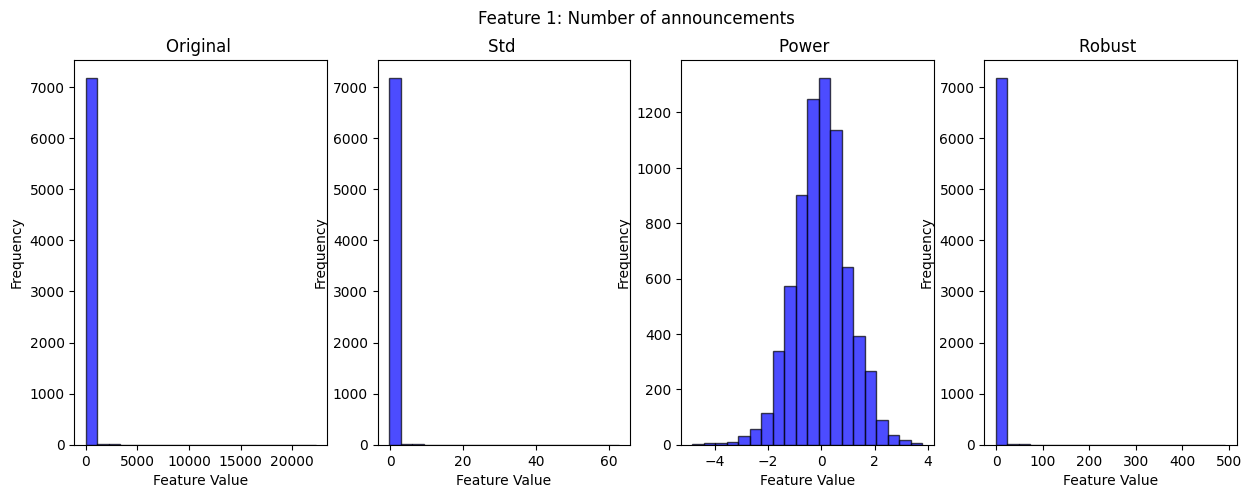

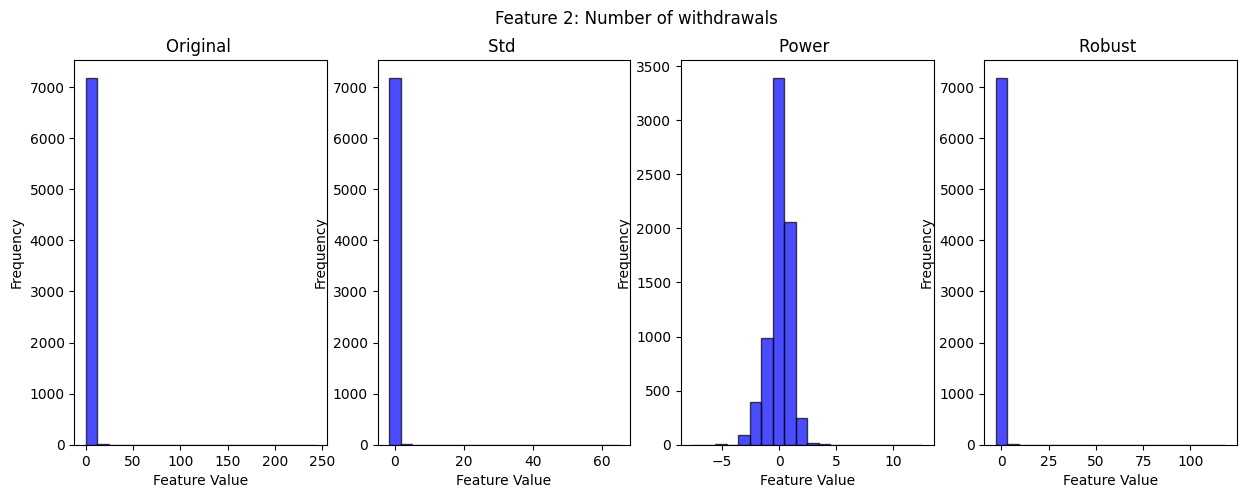

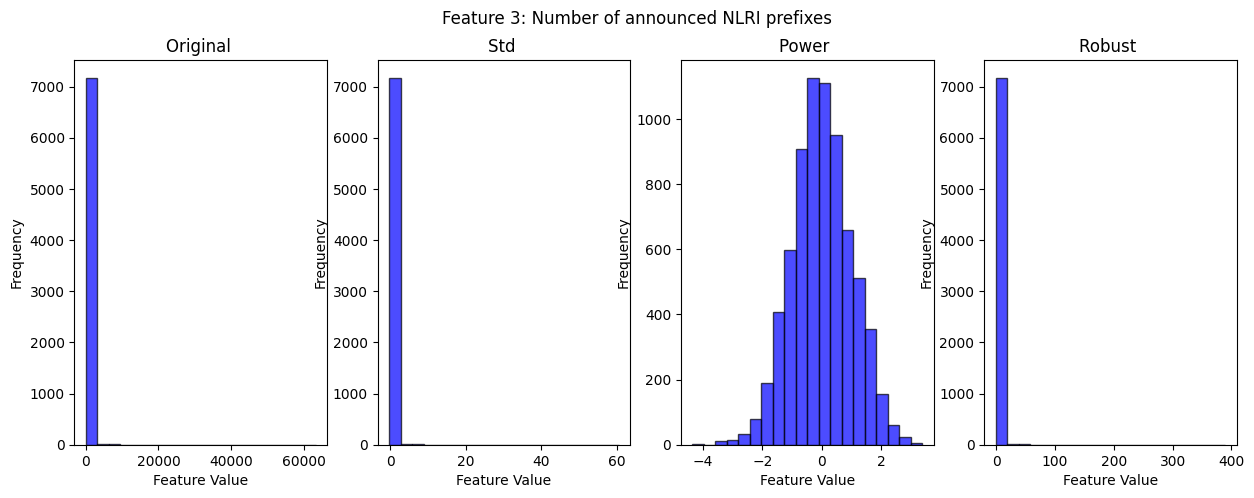

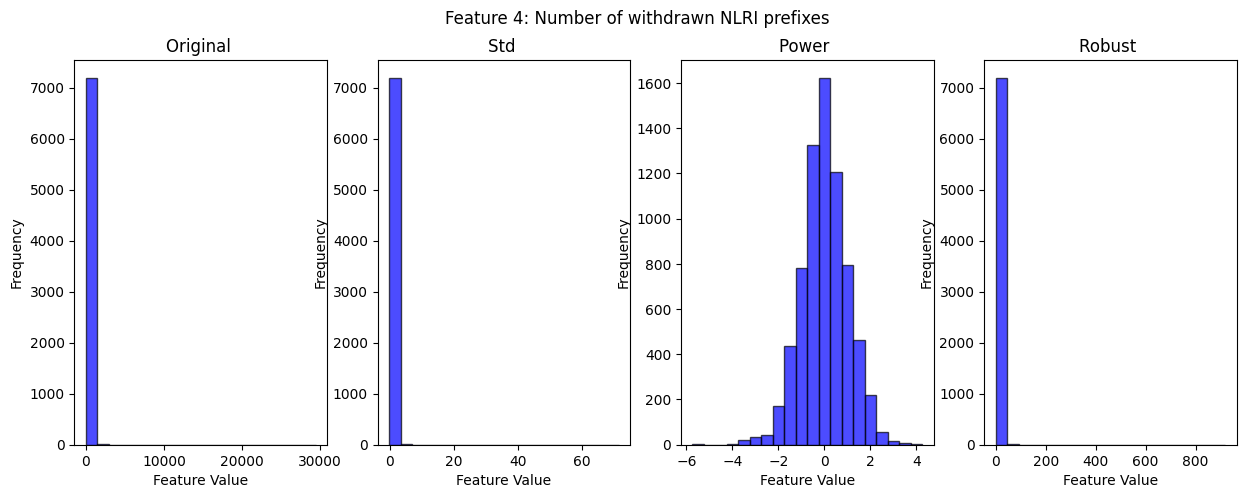

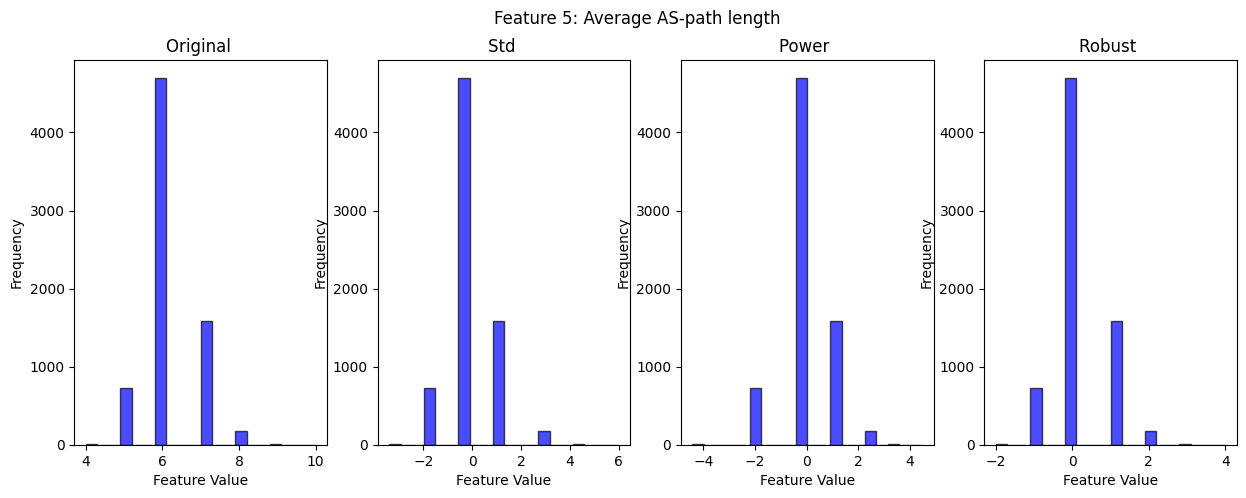

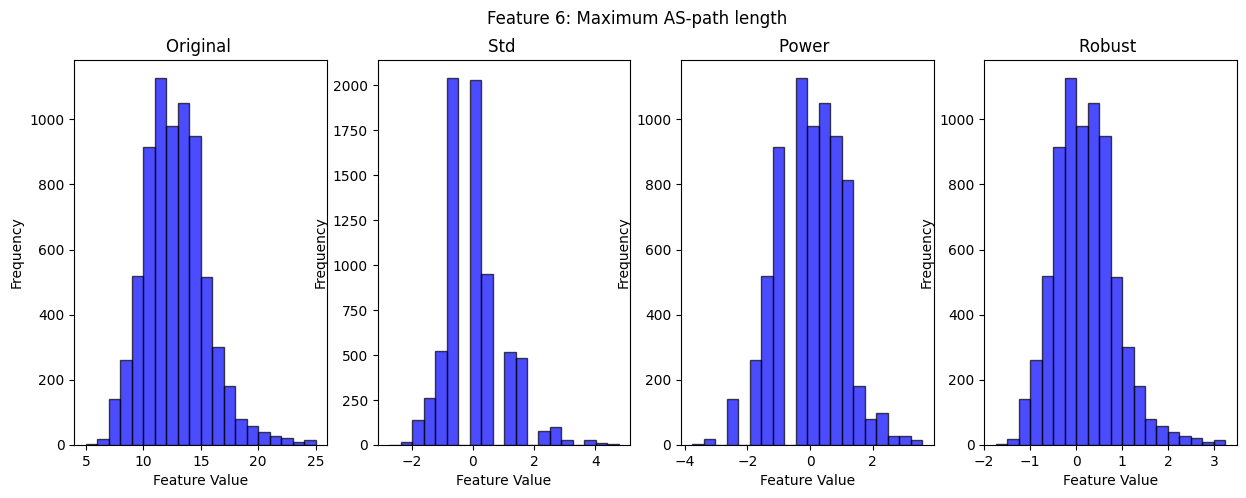

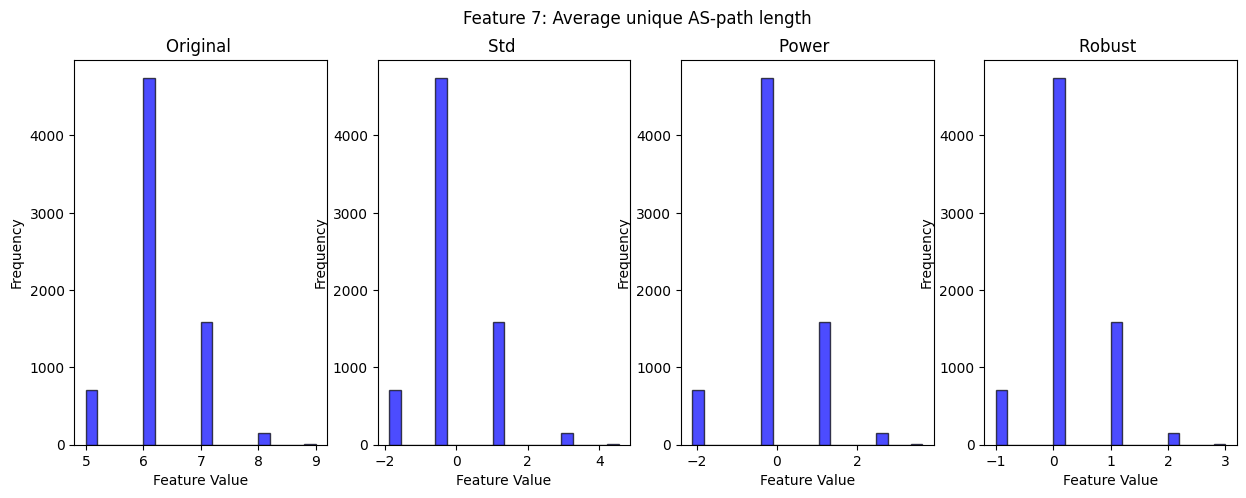

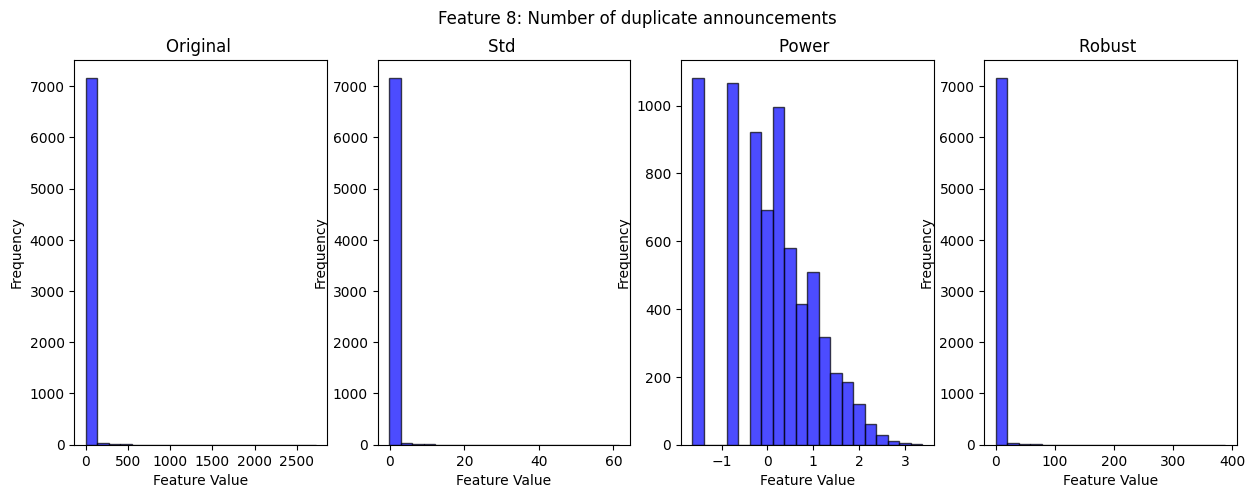

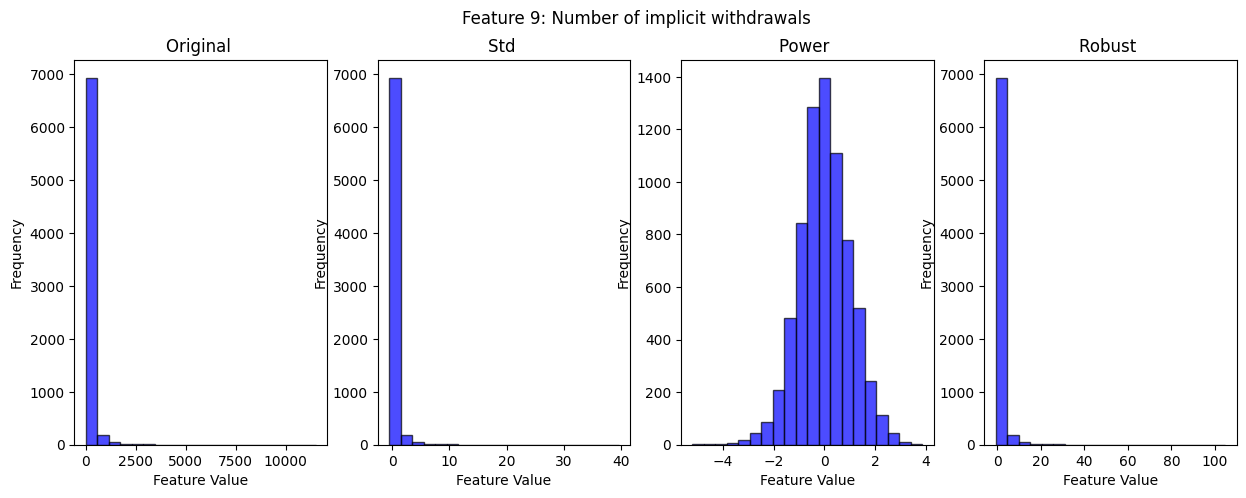

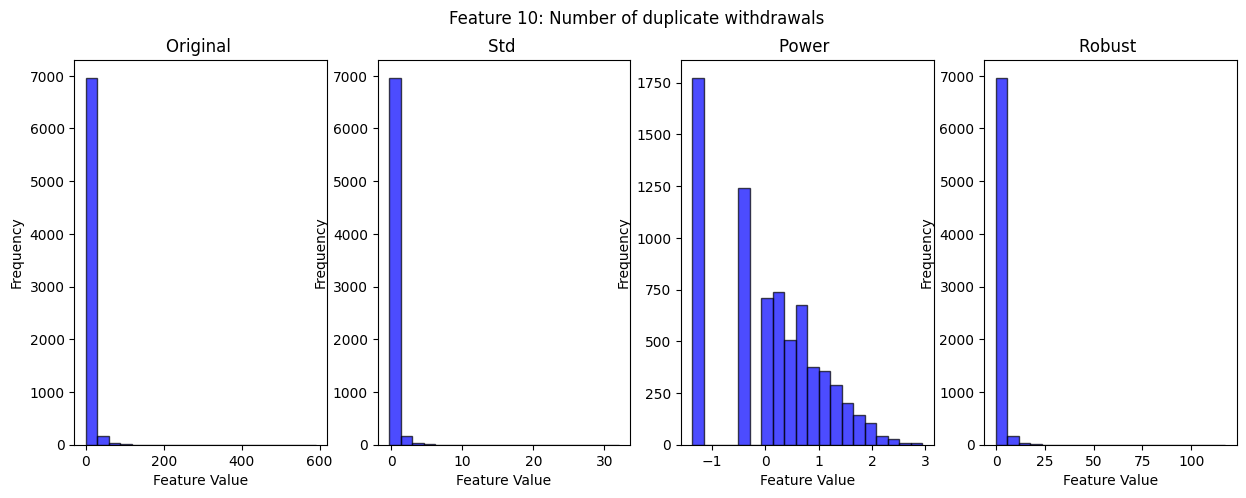

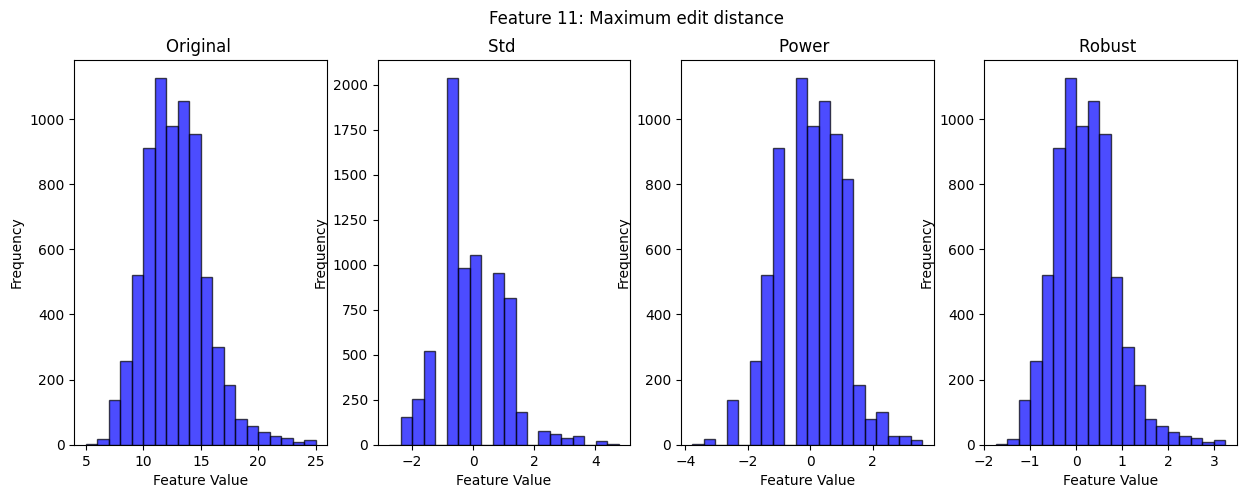

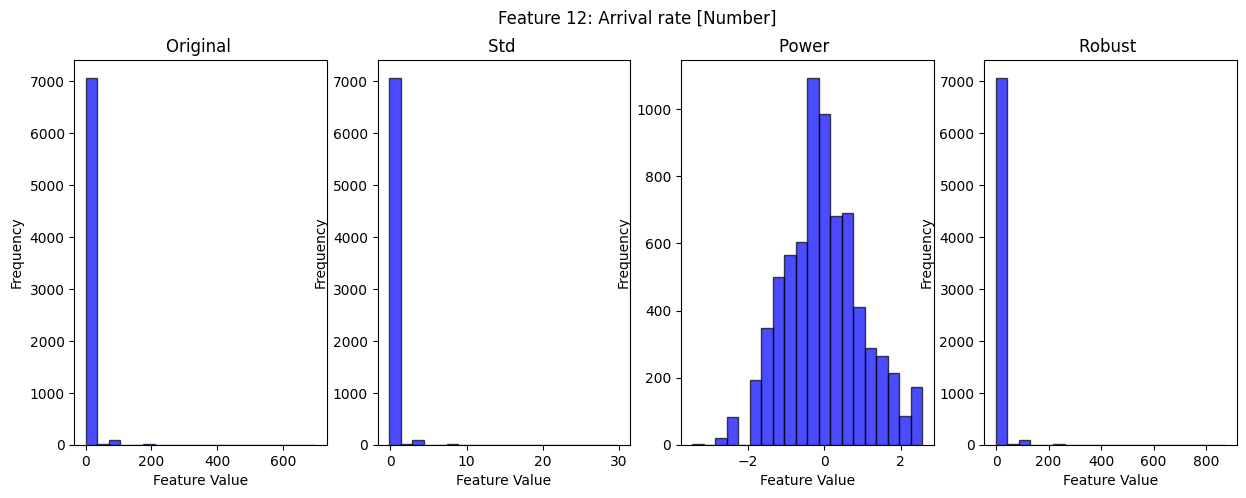

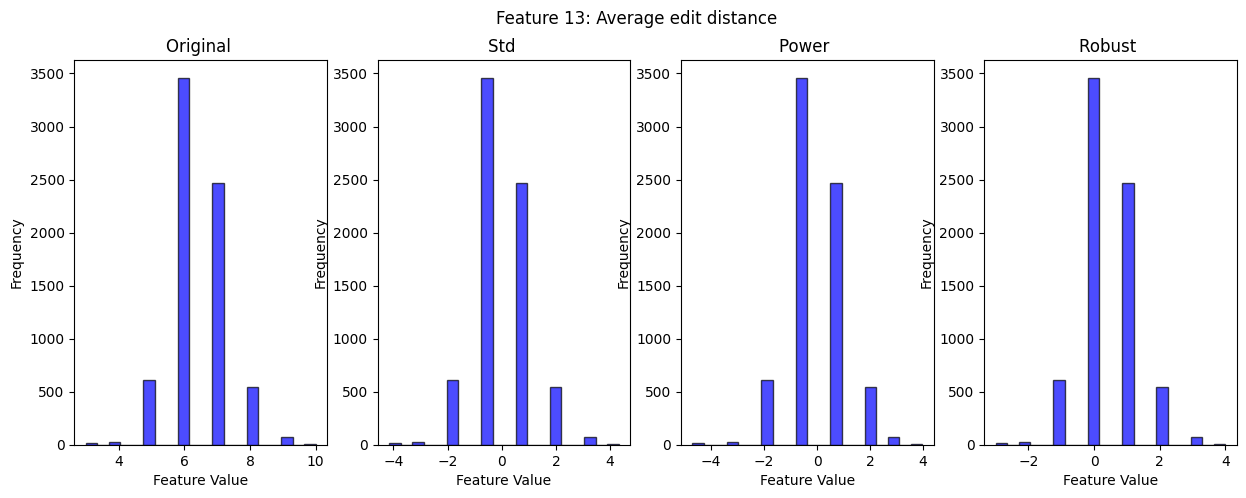

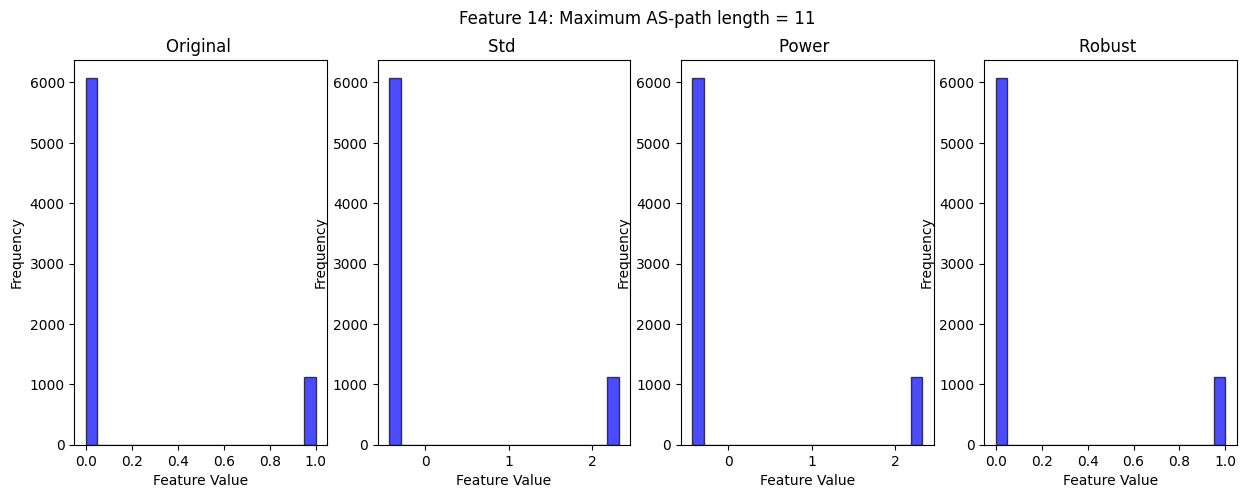

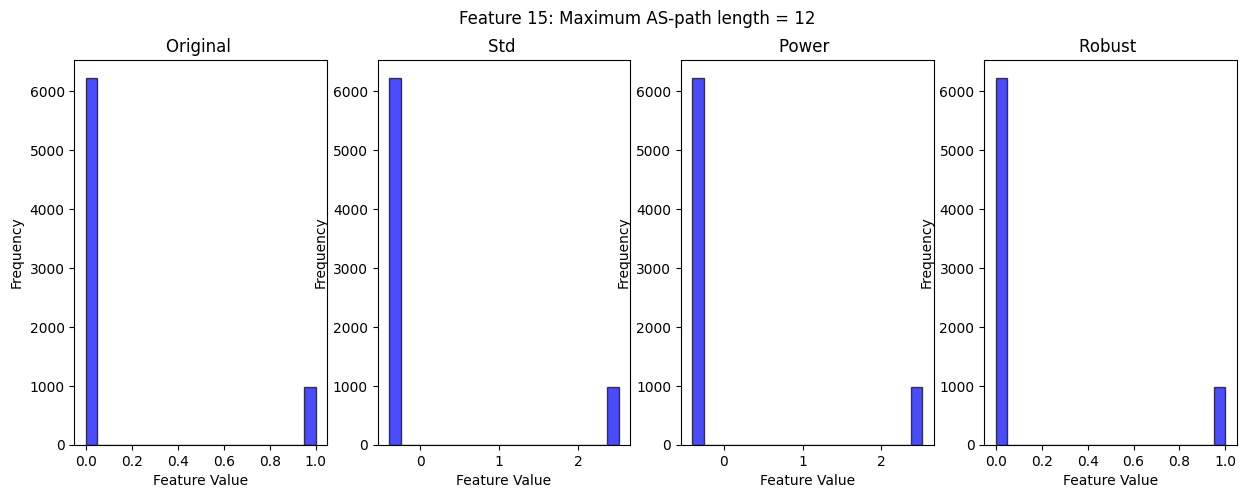

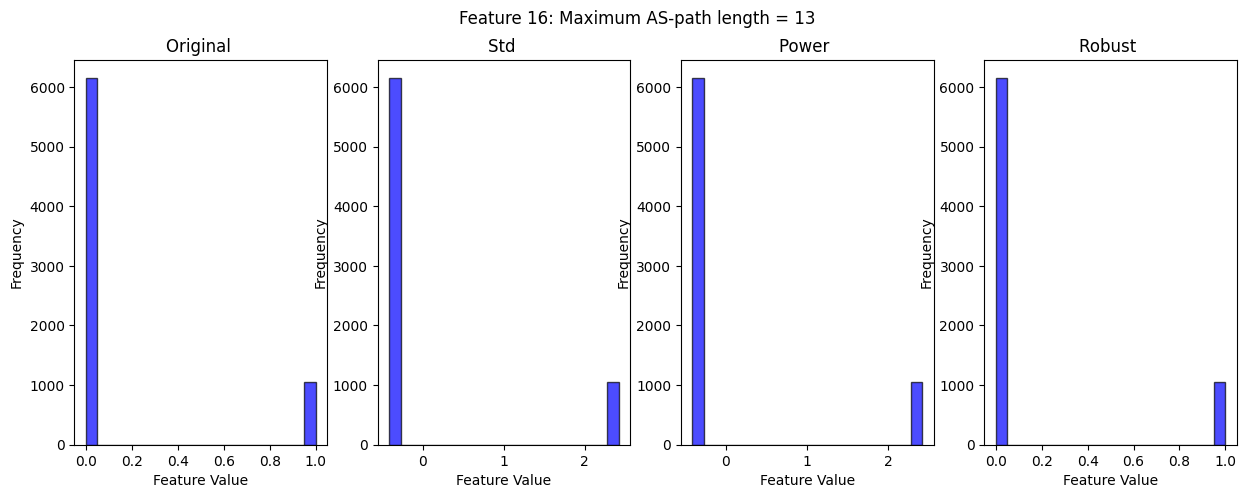

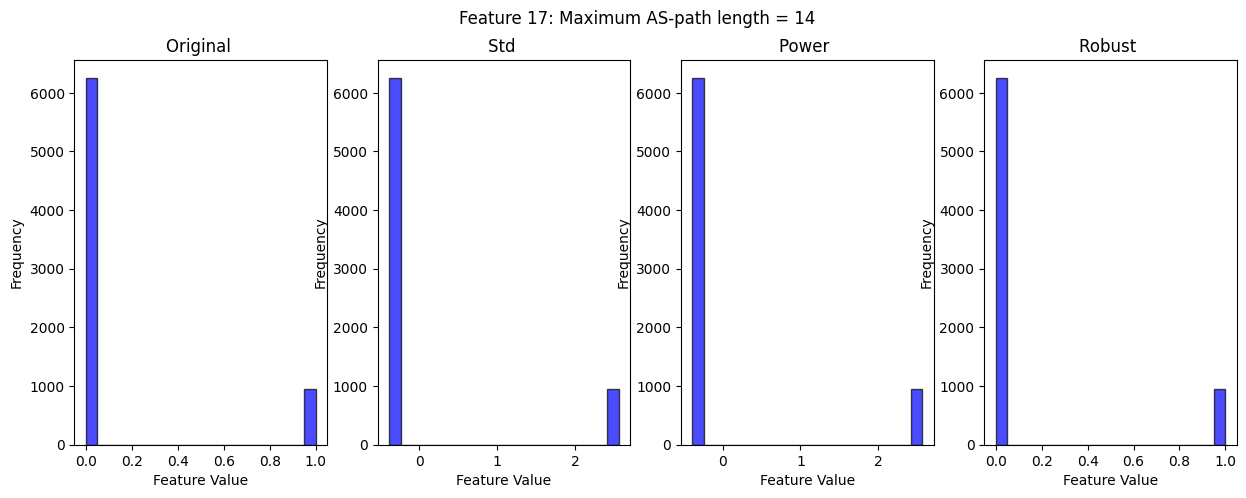

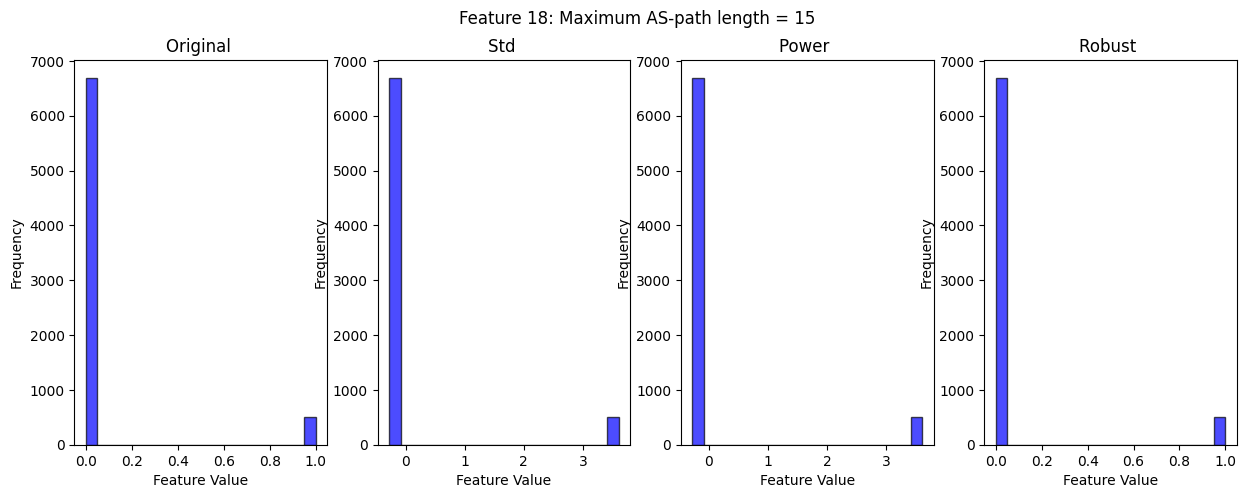

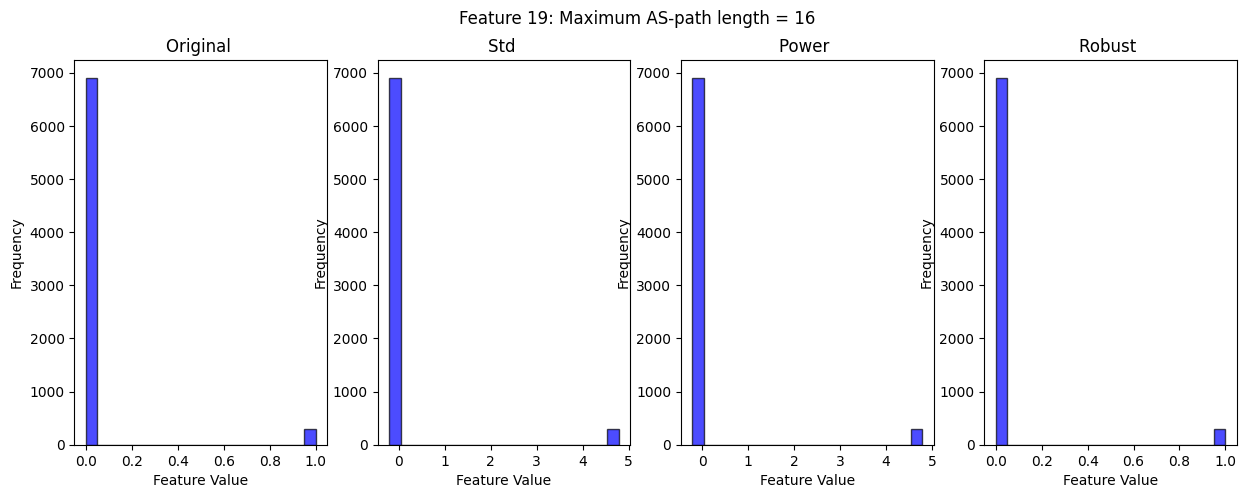

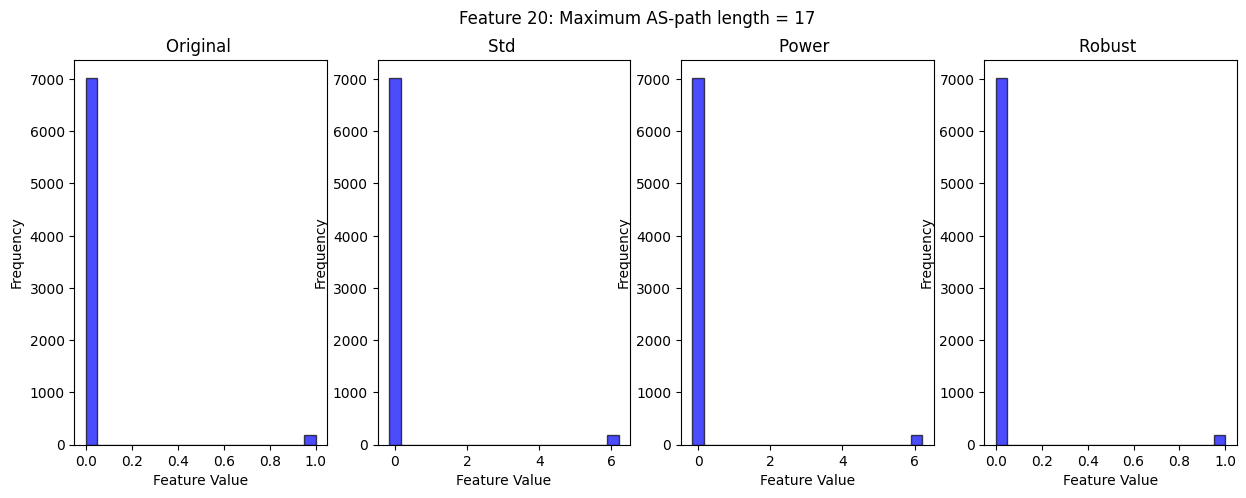

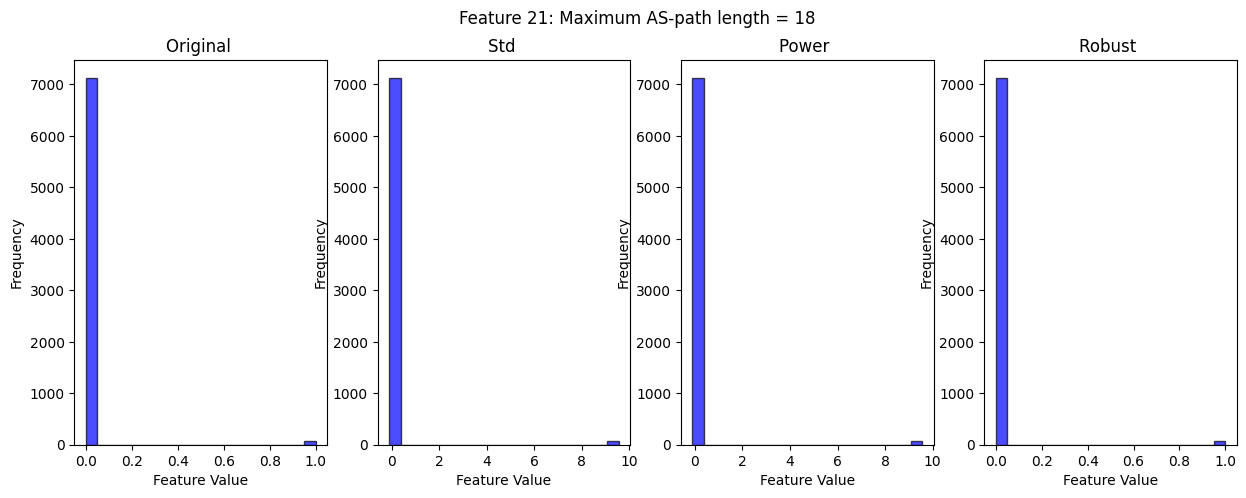

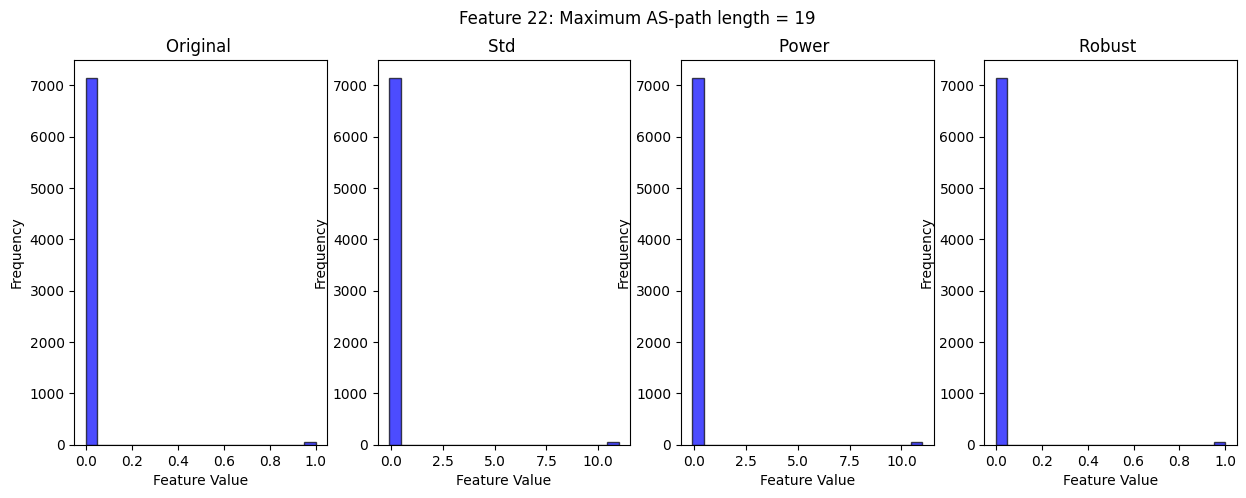

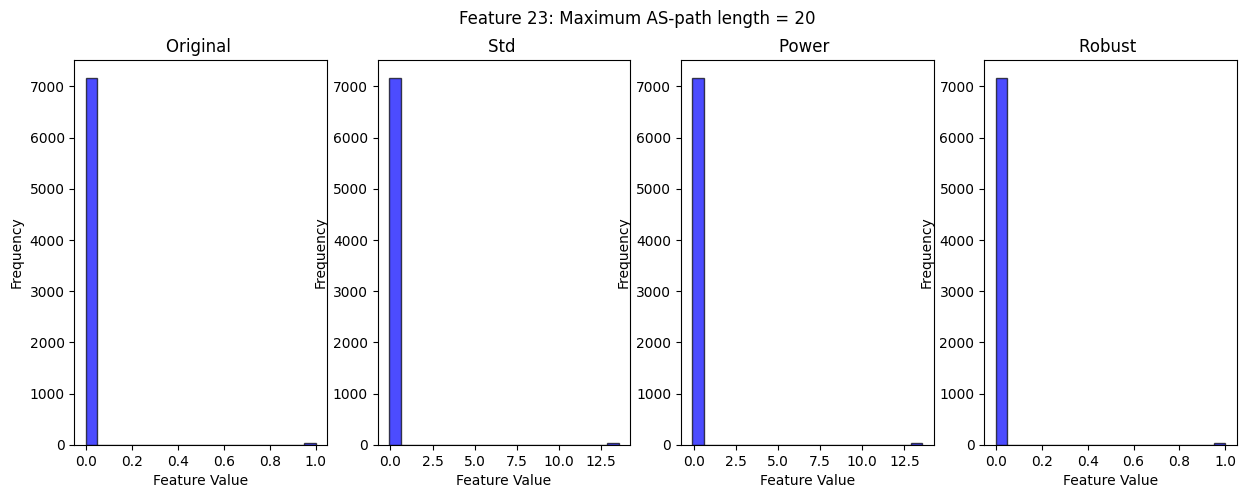

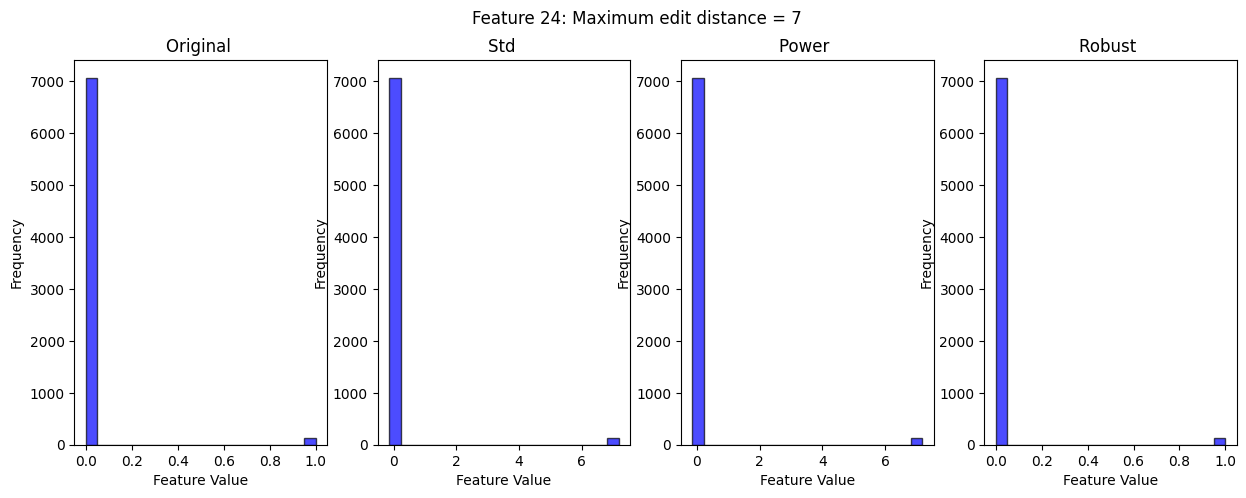

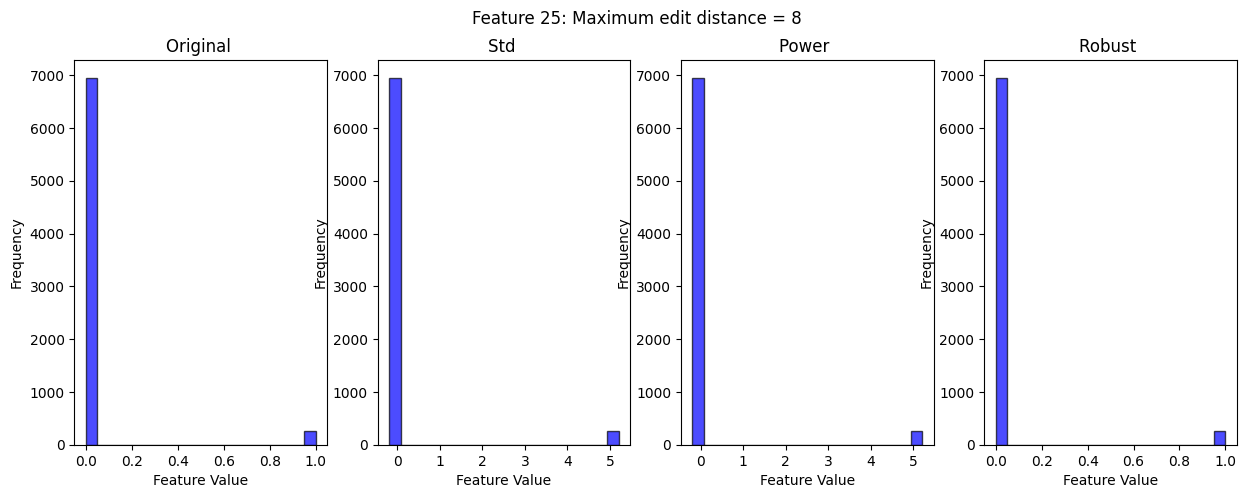

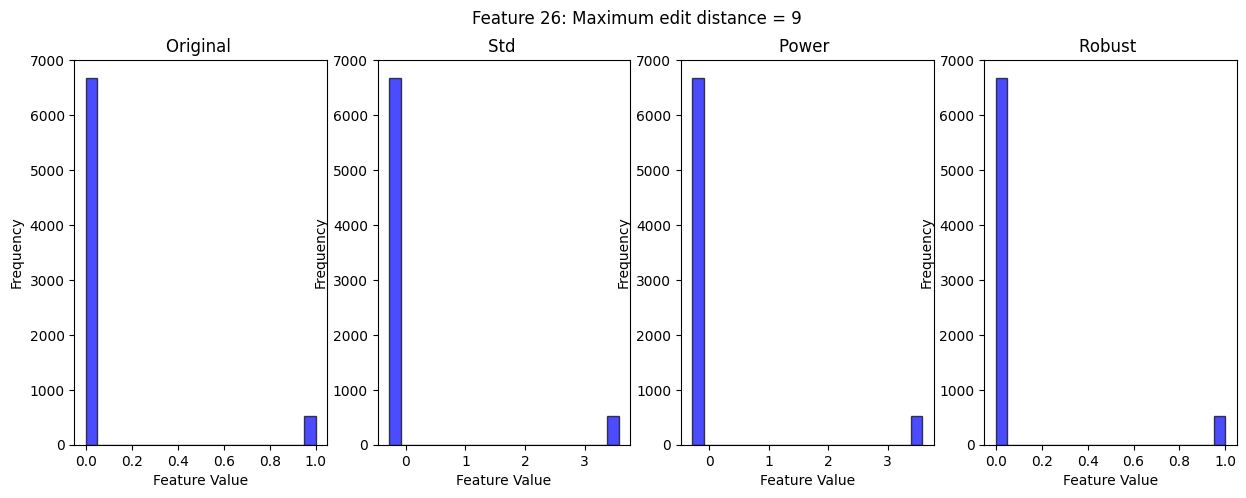

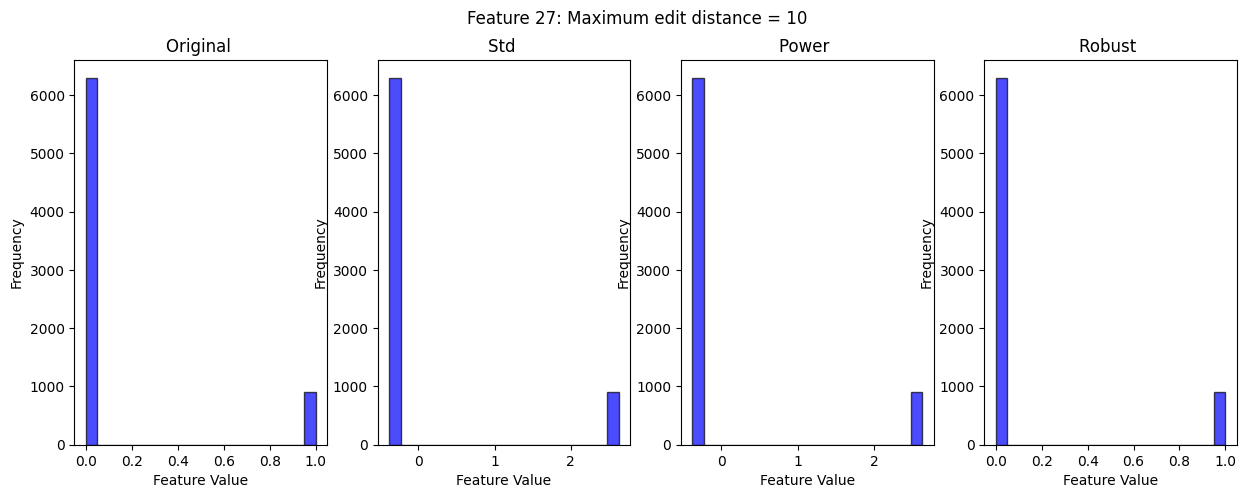

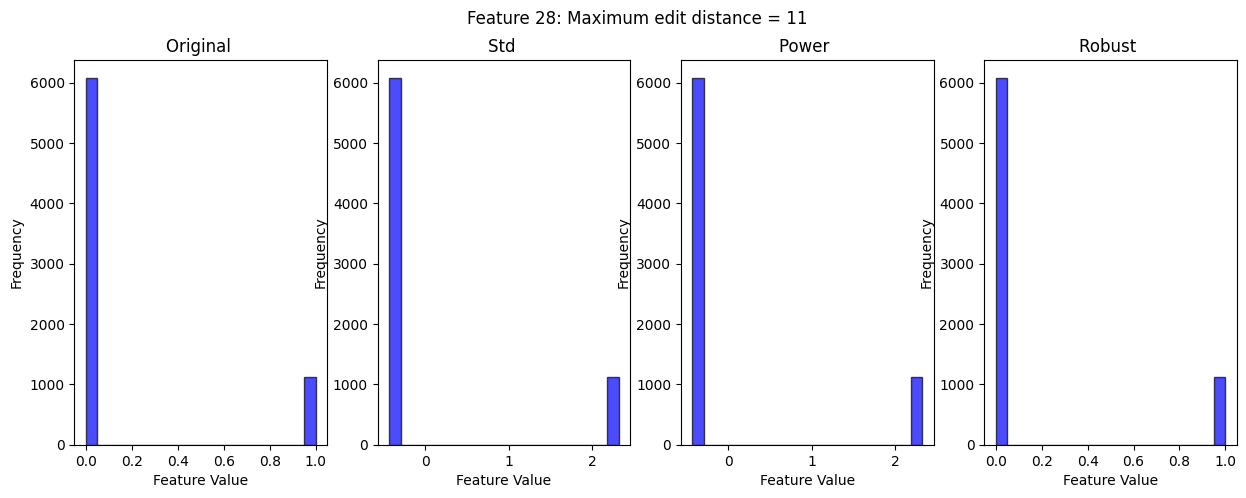

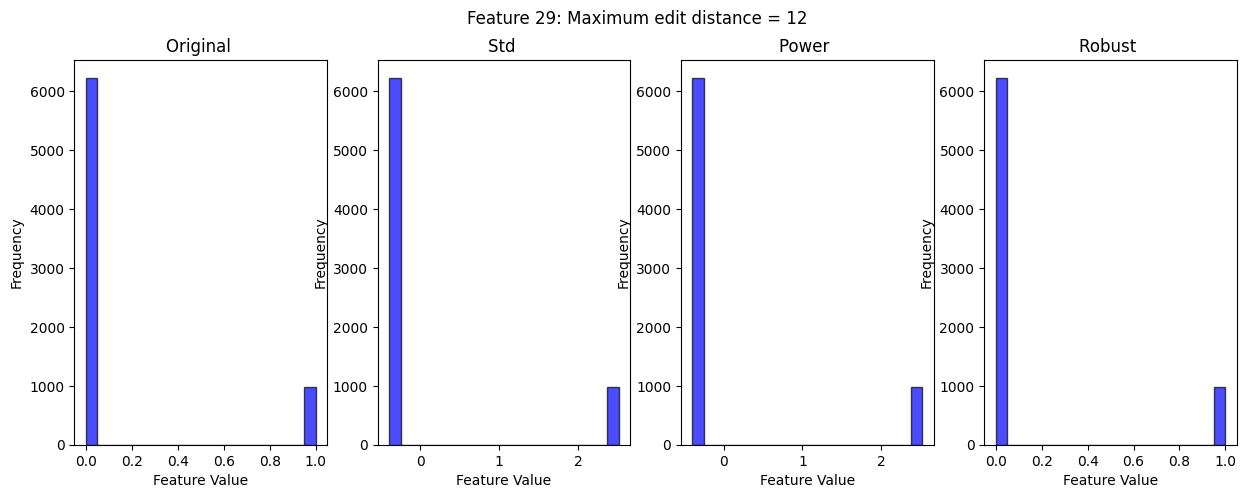

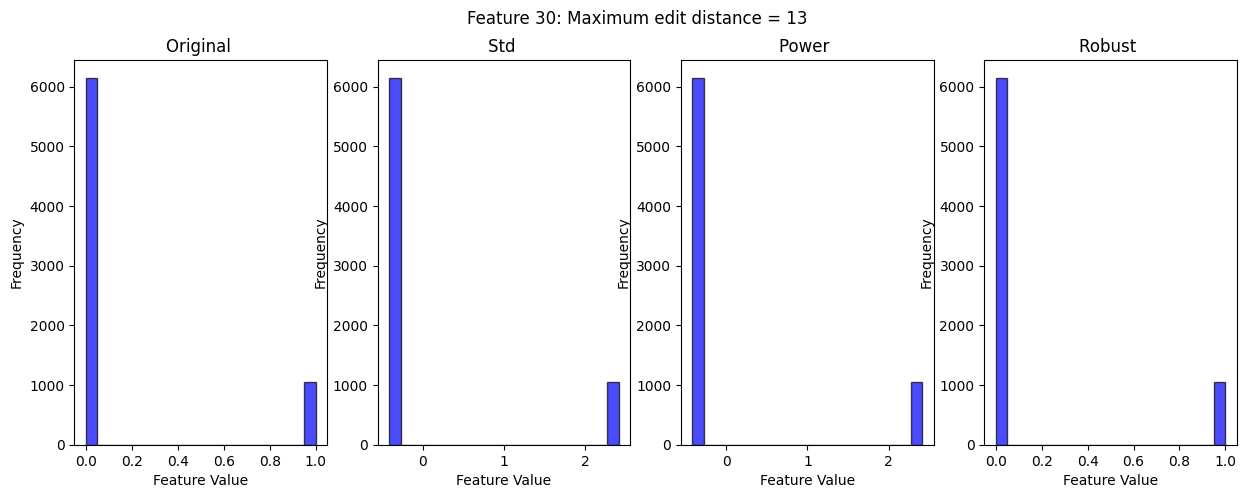

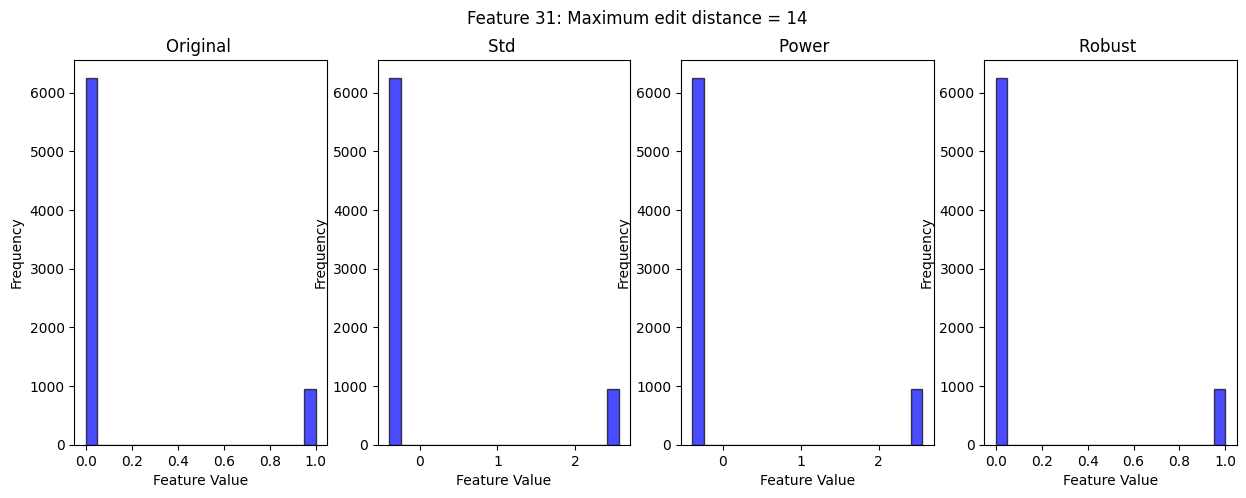

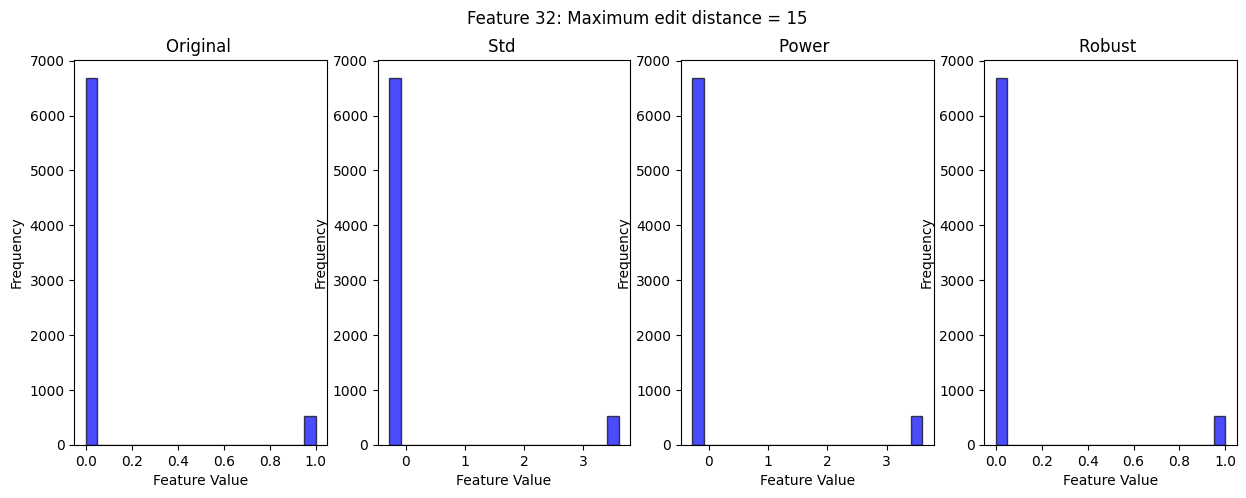

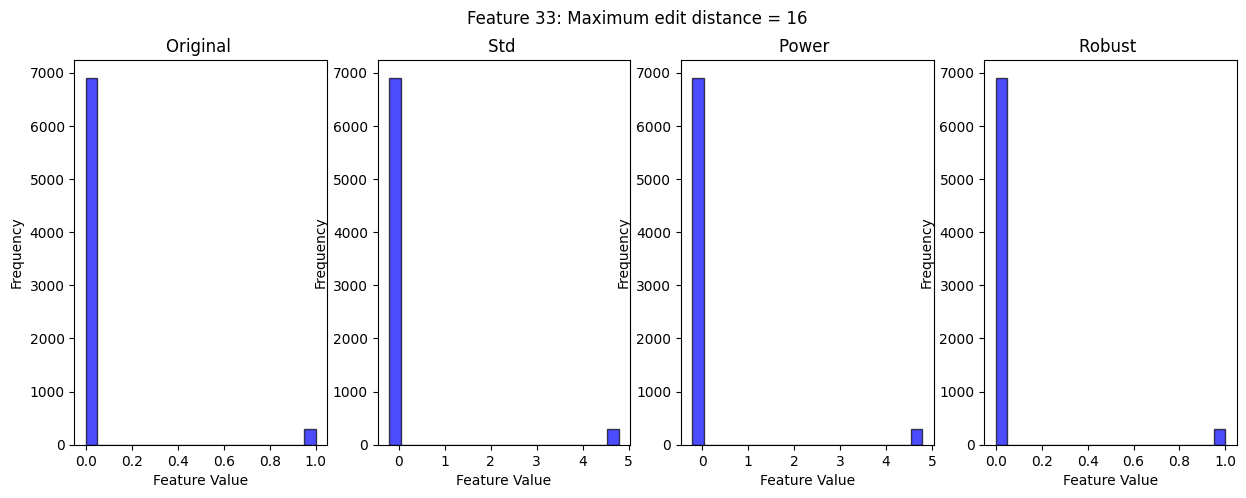

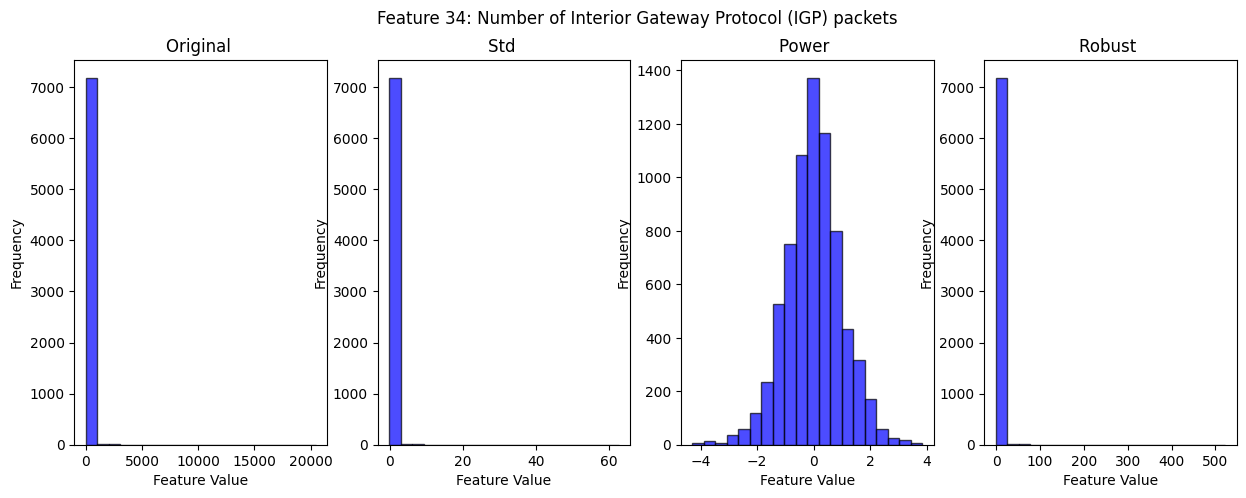

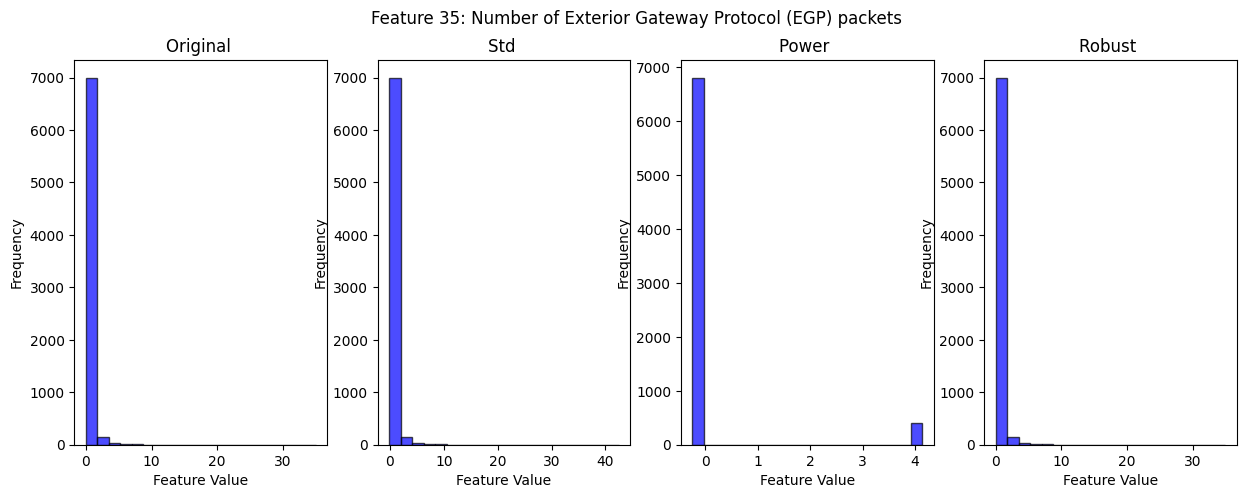

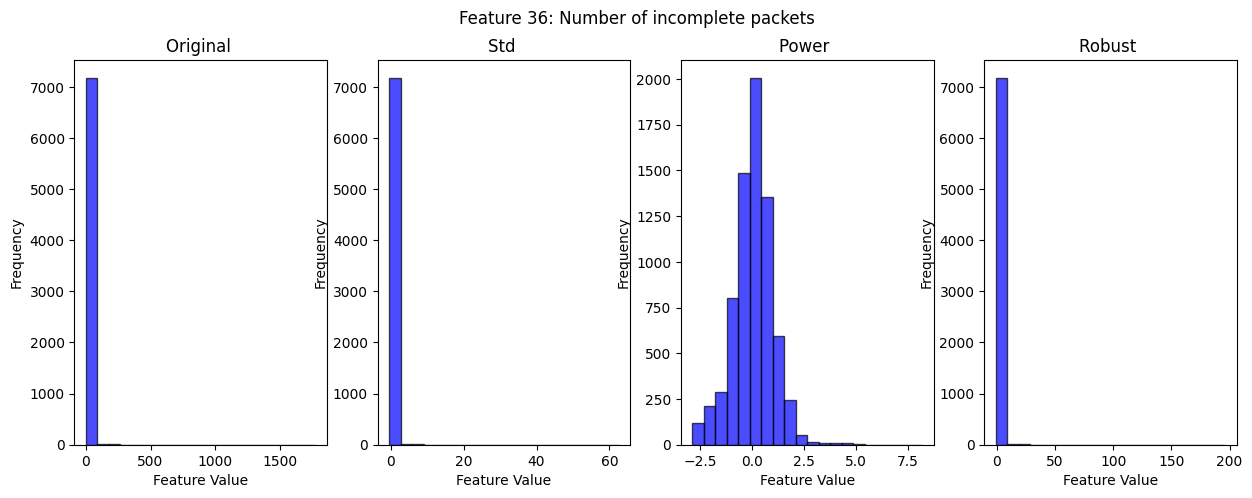

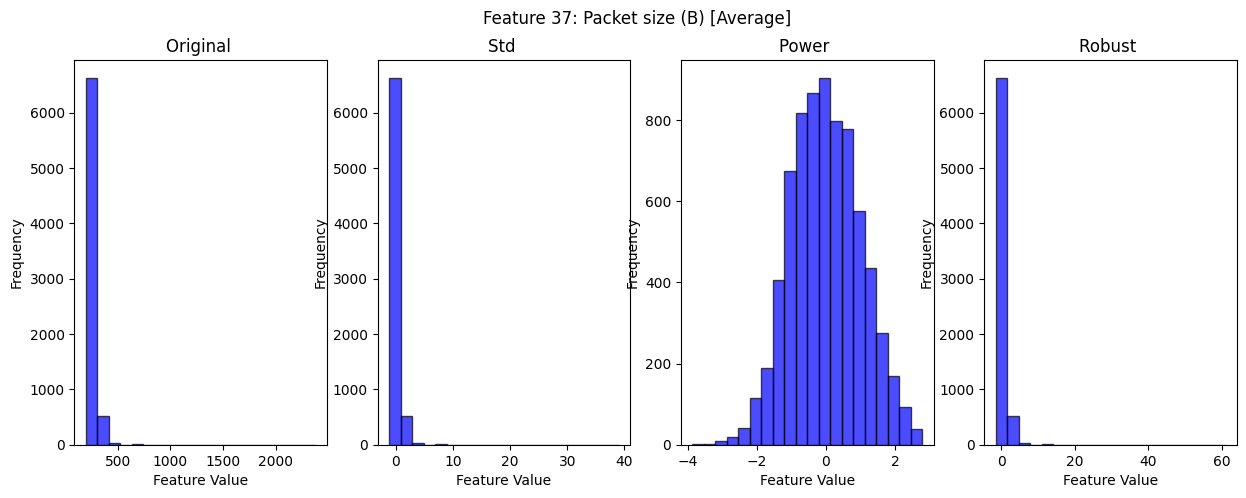

In [3]:
import matplotlib.pyplot as plt


X,y = getFeatures( datasets["Code_Red_I"])
Xp, yp = norm( X, None , "Power")

compareFeatureBaseScalers(X)

# 2. Compare the distribution of features in different datasets
## 2.1 Basic Feature Description Comparisons
Mean
Median
Variance

In [4]:
#compare dataset0, dataset1, dataset2

def getPositiveCount( y ):
    count = y[y == 1].shape[0]
    return count


X,y = getFeatures( datasets["Code_Red_I"])
# fig, ax = plt.subplots(1,1,figsize = (10, 5 ))
Xp, yp = norm( X, None , "Power")

X2,y2 = getFeatures( datasets["Nimda"])
Xp2, yp2 = norm( X, None , "Power")

X3,y3 = getFeatures( datasets["Slammer"])
Xp3, yp3 = norm( X, None , "Power")

xlimit = [300,20,800,400,20, 1000, 1000]

print(X.shape, X2.shape, X3.shape)
print("Code:", getPositiveCount(y))
print("Nimda:", getPositiveCount(y2))
print("Slammer:", getPositiveCount(y3))

(7200, 37) (8609, 37) (7200, 37)
Code: 600
Nimda: 1301
Slammer: 869


In [5]:
def showDescription( data , desc, index):
    start = index * 4
    # 计算均值
    desc[start] = np.mean(data, axis=0)

    # 计算中位数
    desc[start+1] = np.median(data, axis=0)

    # 计算方差
    desc[start+2] = np.var(data, axis=0)

    # 计算标准差
    desc[start+3] = np.std(data, axis=0)

def printDescription( desc ):
    
    # 打印每个特征的统计信息
    for i in range( desc.shape[1] ):
        print(f"Feature {i+1}:")
        print(f"  Mean: {desc[0,i]:.2f},{desc[4,i]:.2f},{desc[8,i]:.2f} ")
        print(f"  Median: {desc[1,i]:.2f},{desc[5,i]:.2f},{desc[9,i]:.2f}")
        print(f"  Variance: {desc[2,i]:.2f},{desc[6,i]:.2f},{desc[10,i]:.2f}")
        print(f"  Standard Deviation: {desc[3,i]:.2f},{desc[7,i]:.2f},{desc[ 11,i]:.2f}")
        print("-" * 30)

desc = np.empty( (12, X.shape[1]) )
showDescription(X, desc, 0)
showDescription(X2, desc, 1)
showDescription(X3, desc, 2)

np.set_printoptions(precision=2, suppress=False)
printDescription( desc )


Feature 1:
  Mean: 97.10,127.42,94.95 
  Median: 67.00,85.00,52.00
  Variance: 124472.12,273597.49,32231.19
  Standard Deviation: 352.81,523.07,179.53
------------------------------
Feature 2:
  Mean: 5.88,6.38,4.90 
  Median: 6.00,6.00,5.00
  Variance: 13.30,157.62,3.94
  Standard Deviation: 3.65,12.55,1.98
------------------------------
Feature 3:
  Mean: 281.11,361.35,274.10 
  Median: 143.00,203.00,124.00
  Variance: 1084743.20,2507133.65,345101.10
  Standard Deviation: 1041.51,1583.39,587.45
------------------------------
Feature 4:
  Mean: 54.40,83.31,56.73 
  Median: 25.00,32.00,21.00
  Variance: 169489.70,2364074.82,108385.70
  Standard Deviation: 411.69,1537.55,329.22
------------------------------
Feature 5:
  Mean: 6.17,6.05,6.25 
  Median: 6.00,6.00,6.00
  Variance: 0.41,0.31,0.38
  Standard Deviation: 0.64,0.56,0.62
------------------------------
Feature 6:
  Mean: 12.29,12.77,12.48 
  Median: 12.00,12.00,12.00
  Variance: 7.10,16.47,10.07
  Standard Deviation: 2.66,4.06,3

## 2.2 Compare the KL of datasets
The KL divergence is a measure of the difference between two probability distributions. It is used to measure the similarity between two distributions. In this notebook, we will compare the KL divergence of the datasets.

We could notice that for most features, the KL divergence is very low. This means that the distributions of the features are very similar. However, there are some features that have a high KL divergence. Especially Feature [5, 7],

In [6]:
from scipy import stats
from scipy.special import rel_entr

# ks_stat, p_val = stats.ks_2samp( X, X2)
# print("KS-test statistic:", ks_stat)
# print("p_Val:",p_val)

# ks_stat, p_val = stats.ks_2samp( X, X3)
# print("KS-test statistic:", ks_stat)
# print("p_Val:",p_val)

# ks_stat, p_val = stats.ks_2samp( X2, X3)
# print("KS-test statistic:", ks_stat)
# print("p_Val:",p_val)

def getKL( data, data2, index ):
    feature1= data[:,index]
    feature2= data2[:,index]
    hist1, bin_edges1 = np.histogram(feature1, bins=30, density=True)
    hist2, bin_edges2 = np.histogram(feature2, bins=30, density=True)

    # 第三步：为了计算 KL 散度，我们需要确保两个分布的 bin 对齐
    # 使用 bin_edges1 作为基础重新计算 hist2
    hist2, _ = np.histogram(feature2, bins=bin_edges1, density=True)

    # 处理 hist 中的零值，以避免计算 KL 散度时出现 log(0)
    hist1 += 1e-10  # 添加一个小的正值以防止除以零
    hist2 += 1e-10

    # 第四步：计算 KL 散度
    kl_divergence = np.sum(rel_entr(hist1, hist2))
    return kl_divergence


def compareKL( data, data1 ):
    for i in range(37):
        print(f"KL-divergence:{i}", getKL(data, data1, i))

print("Compare X and X2:")
compareKL(X, X2)
print("Compare X and X3:")
compareKL (X, X3)
print("Compare X2 and X3:")
compareKL (X2, X3)


Compare X and X2:
KL-divergence:0 5.640530219670112e-06
KL-divergence:1 0.002520002720096075
KL-divergence:2 1.5965366573932022e-06
KL-divergence:3 8.305160351103825e-06
KL-divergence:4 0.14791893395042496
KL-divergence:5 0.043477790869656516
KL-divergence:6 0.19871042694058588
KL-divergence:7 4.6214131263854924e-05
KL-divergence:8 3.7430978133132906e-05
KL-divergence:9 0.0007261449462291427
KL-divergence:10 0.04334655874887432
KL-divergence:11 0.0002805527725164876
KL-divergence:12 0.10575057222225111
KL-divergence:13 0.021108370704444546
KL-divergence:14 0.019585714662495812
KL-divergence:15 0.07188608670286789
KL-divergence:16 0.04421598297952867
KL-divergence:17 0.1636807008539567
KL-divergence:18 0.10414649670919096
KL-divergence:19 0.0018354939451018307
KL-divergence:20 0.01139546731649893
KL-divergence:21 0.007997788674927571
KL-divergence:22 0.09887551156582919
KL-divergence:23 0.03386779565978895
KL-divergence:24 0.007466472783654879
KL-divergence:25 0.0001146251067348468
KL-d

# 3 Compare the features between the three datasets

## 3.1 some basic functions for feature analysis



In [56]:
from src.xpr_test import *
def getData( raw_data, time_span, slide_window = False, norm_type = "Power"):
    data = aggregate_rows( raw_data, time_span, slide_window)
    X, y = preprocess( data )
    X, no = norm( X, None, scaleType = "Power")
    return X,y

def my_test( combo, time_span = 1, slide_window = False, norm_type = "Power"):
    raw_train_datasets = []
    for name in combo["train"]:
        raw_train_datasets.append(datasets[name])
    raw_test_dataset = datasets[combo["test"]]

    train_datasets = aggregate_datasets(raw_train_datasets, time_span, sliding_window = slide_window)
    test_dataset = aggregate_rows(datasets[combo["test"]], time_span, sliding_window = slide_window)

    train_dataset = concatenate_datasets(train_datasets)
        
    train_x, train_y = preprocess(train_dataset)
    test_x, test_y = preprocess(test_dataset)

    train_x, test_x = norm( train_x, test_x, "Power")

    predicted_list = xpr_train_test(train_x, train_y, test_x)
    predicted_list = np.round(predicted_list).astype(int)
    return predicted_list

def compare_features( data, data1, data2, feature_range, density = False, xlimit = None , legend_name = ["Data1","Data2","Data3"]):
    for i in range(feature_range):
        fig, ax = plt.subplots(1,1,figsize = (10, 5 ))
        range_val = None
        if( xlimit is not None ):
            if( len(xlimit) > i ):
                range_val = (0,xlimit[i])

        print(range_val)
     
        ax.hist( data[:,i], bins = 100, range=range_val, color = 'blue',edgecolor='black', density=density, alpha=0.3 )
        ax.hist( data1[:,i], bins = 100, range=range_val,color = 'green',edgecolor='black', density=density,alpha=0.3 )
        ax.hist( data2[:,i], bins = 100, range=range_val,color = 'red',edgecolor='black',density=density,alpha=0.2 )
        if range_val is not None:
            plt.xlim(left=0, right= range_val[1])

        ax.legend(legend_name)

        ax.set_xlabel( feature_name(i+1))
        ax.set_ylabel("Frequency") 

## 3.2 Compare the raw features between the datasets

(7200, 37)
(8609, 37)
(7200, 37)


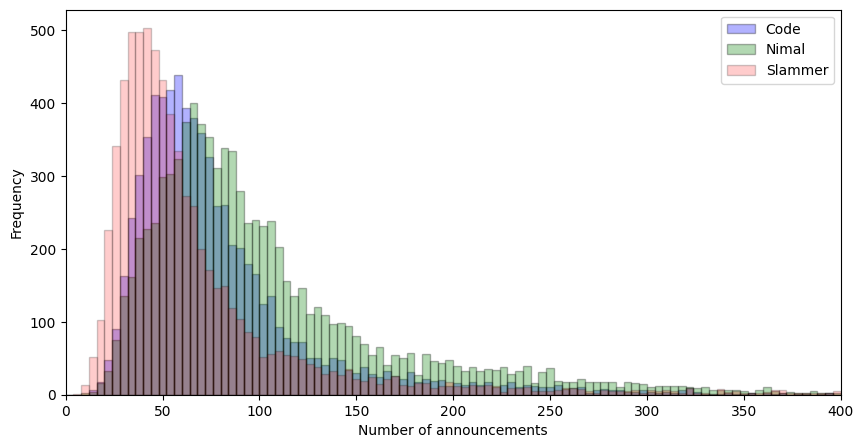

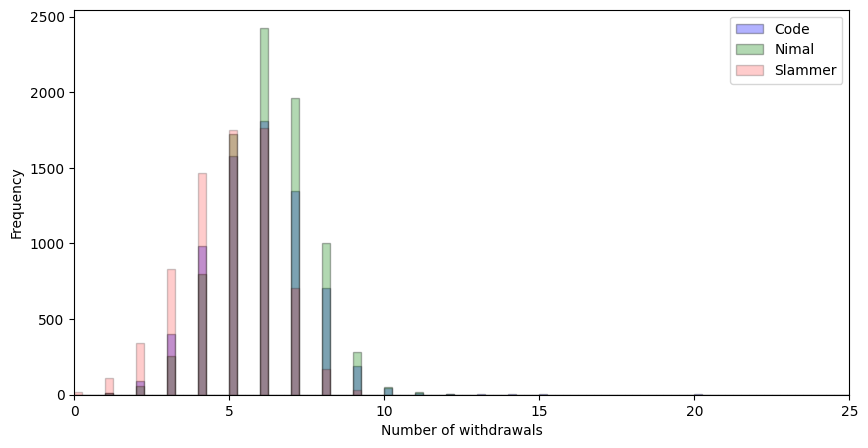

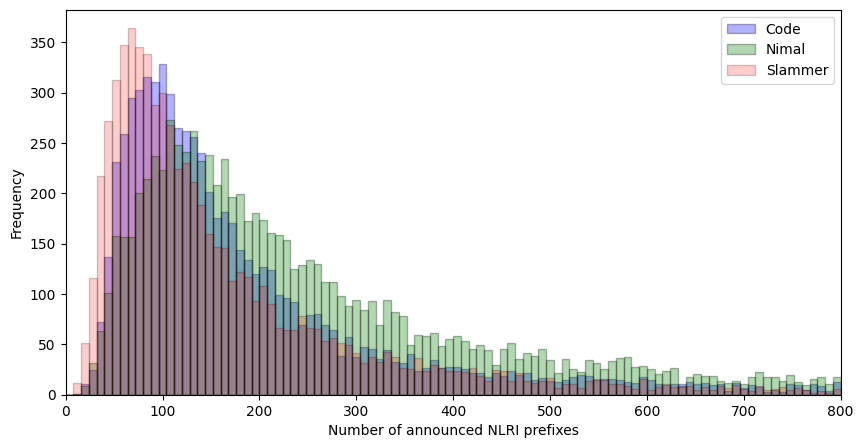

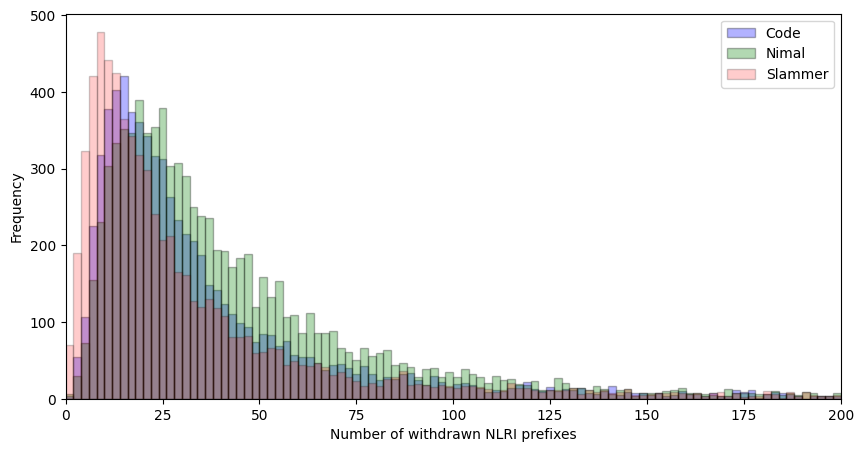

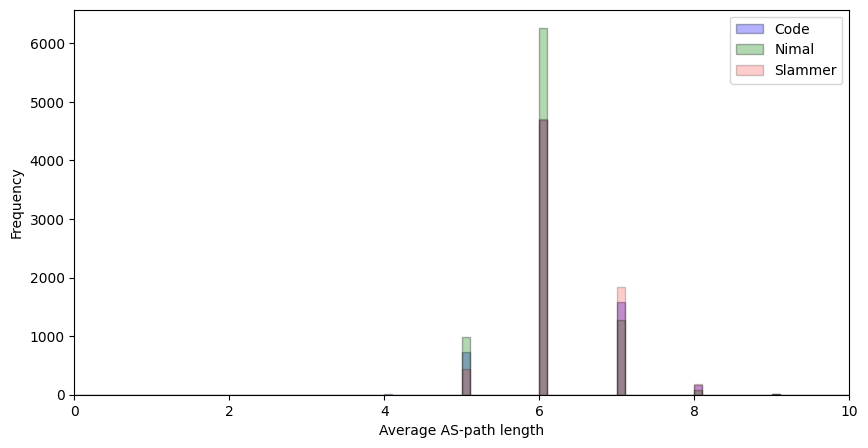

In [24]:
X,y = preprocess( dataset0)

X1,y1 = preprocess( dataset1)

X2,y2 = preprocess( dataset2 )

print( X.shape)
print(X1.shape)
print(X2.shape)

compare_features( X, X1, X2, 5, xlimit = [400, 25, 800,200,10], legend_name=["Code","Nimal","Slammer"])

## 3.3 Compare the scaled features between Normal and Abnormal

(7200, 37)
[[ -7.99 -15.56  -4.35 ...  -0.41  -1.44  -0.14]
 [ -3.71  -6.16  -2.52 ...  -0.41  -0.75  -0.59]
 [ -2.34  -3.03  -1.89 ...  -0.41  -0.69  -0.92]
 ...
 [  0.03   0.44  -0.28 ...  -0.41  -1.93  -0.44]
 [ -0.38  -0.08  -0.75 ...  -0.41  -2.18  -0.96]
 [ -0.96  -0.28  -1.04 ...  -0.41  -1.27  -1.04]]
None
None
None
None
None


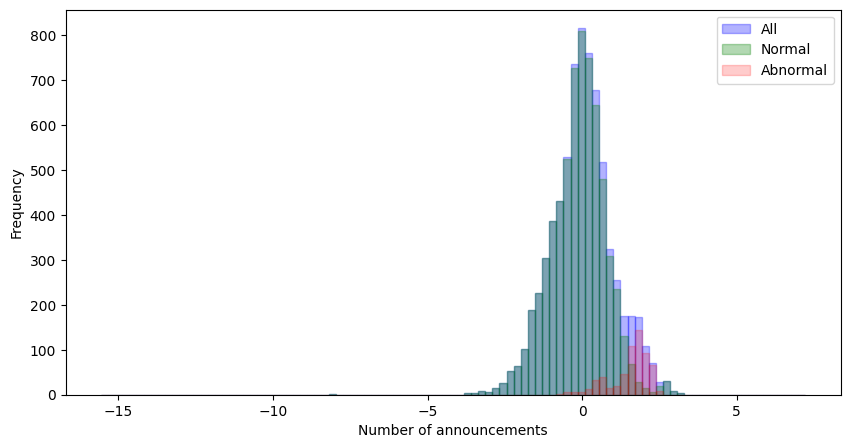

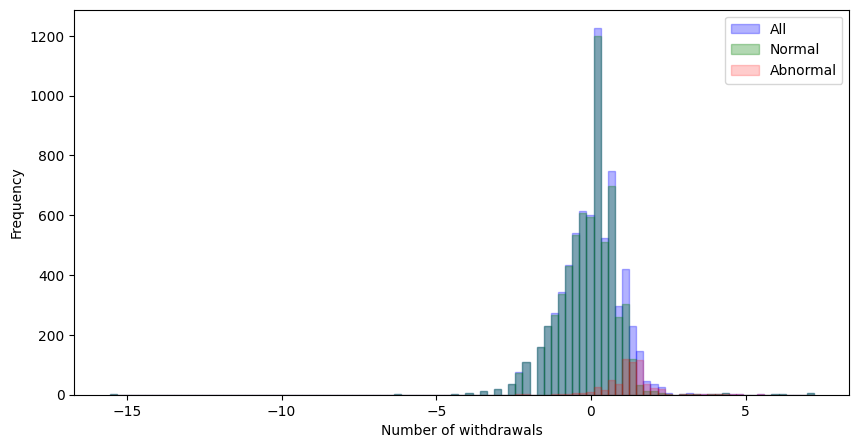

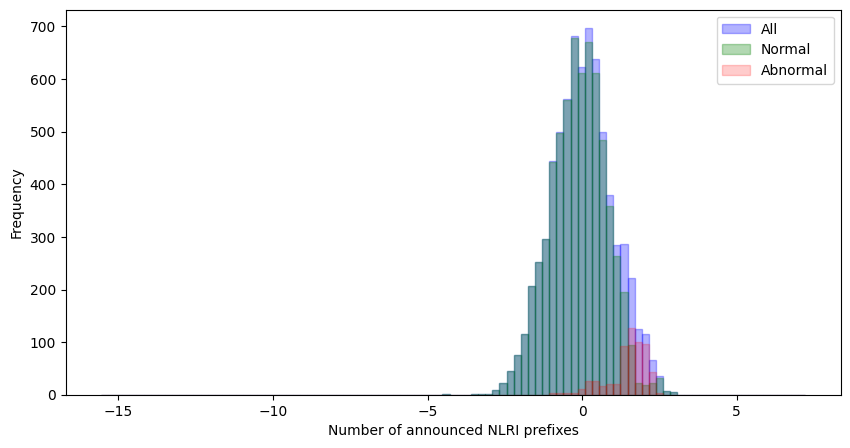

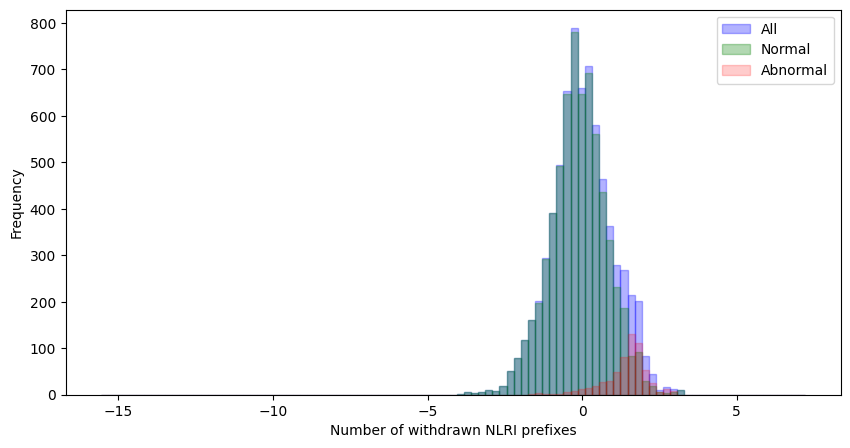

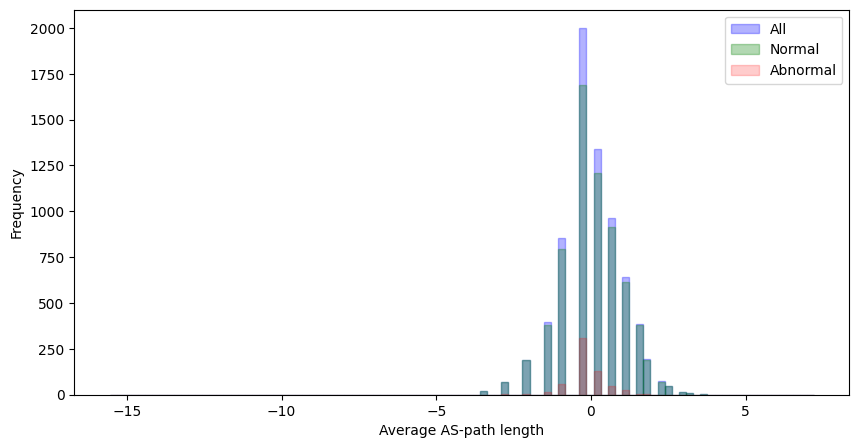

In [54]:


def my_compare_features( data, data1, data2, feature_range, density = False, xlimit = None , legend_name = ["Data1","Data2","Data3"]):
    for i in range(feature_range):
        fig, ax = plt.subplots(1,1,figsize = (10, 5 ))
        range_val = None
        if( xlimit is not None ):
            if( len(xlimit) > i ):
                range_val = (0,xlimit[i])

        print(range_val)

        min_value = min(data1.min(), data2.min(), data.min())
        max_value = max(data1.max(), data2.max(), data.max())
        bins = np.linspace(min_value, max_value, 100)

     
        ax.hist( data[:,i], bins = bins, range=range_val, color = 'blue',edgecolor='blue', density=density, alpha=0.3 )
        ax.hist( data1[:,i], bins = bins, range=range_val,color = 'green',edgecolor='green', density=density,alpha=0.3 )
        ax.hist( data2[:,i], bins = bins, range=range_val,color = 'red',edgecolor='red',density=density,alpha=0.2 )
        if range_val is not None:
            plt.xlim(left=0, right= range_val[1])

        ax.legend(legend_name)

        ax.set_xlabel( feature_name(i+1))
        ax.set_ylabel("Frequency") 

time_span = 5
Xp1,y1 = getData( dataset0,time_span, slide_window= True)
print(Xp1.shape)
print(Xp1)

X_nor = Xp1[ y1!=1]
X_abnor = Xp1[ y1 == 1 ]



my_compare_features( Xp1, X_nor, X_abnor, 5, legend_name=["All","Normal","Abnormal"], density = False)

## 3.3 Abnormal vs Abnomal_mis

Feature nodes in window  0 : Max Val of Output  38.70483387028739  Min Val  -44.75549174487605
Feature nodes in window  1 : Max Val of Output  43.28857222999649  Min Val  -31.204944514016464
Feature nodes in window  2 : Max Val of Output  32.449121974913034  Min Val  -44.618103929225285
Feature nodes in window  3 : Max Val of Output  38.67768638761024  Min Val  -36.520923012017974
Feature nodes in window  4 : Max Val of Output  38.97295427041158  Min Val  -40.708231686120946
Enhancement nodes: Max Val of Output  0.28396650582741595  Min Val  -1.277503553168925
Training has been finished!
The Total Training Time is :  0.2868020534515381  seconds
xx.shape (15809, 2)
xx [[ 0.85  0.15]
 [ 0.12  0.88]
 [ 0.03  0.97]
 ...
 [-0.13  1.13]
 [-0.22  1.22]
 [-0.24  1.24]]
Training Accuracy is :  93.78202289834904  %
Testing has been finished!
The Total Testing Time is :  0.056053876876831055  seconds
Nor_mis: (6600, 37) : (95, 37)
Abnor_mis: (359, 37) : (359, 37)
None
None
None
None
None


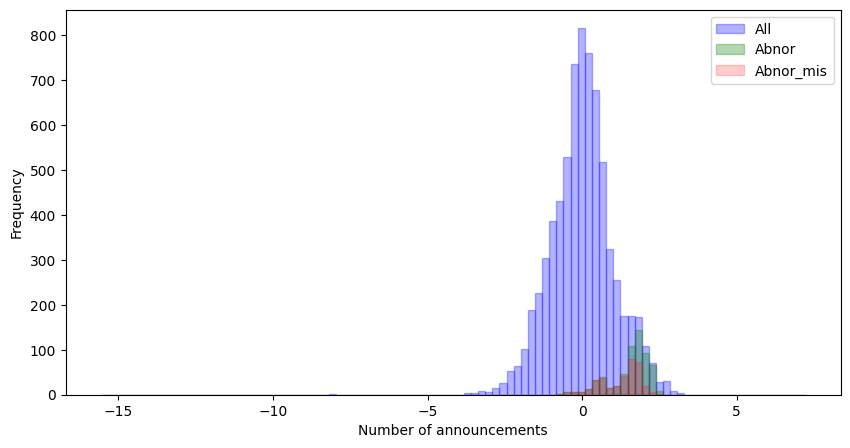

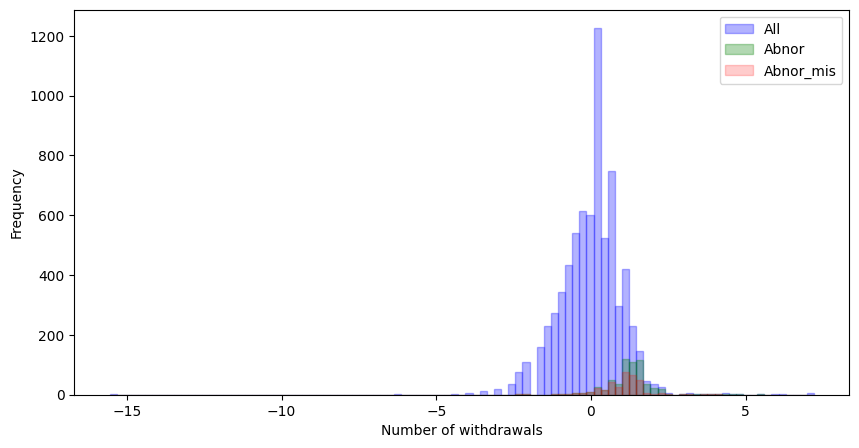

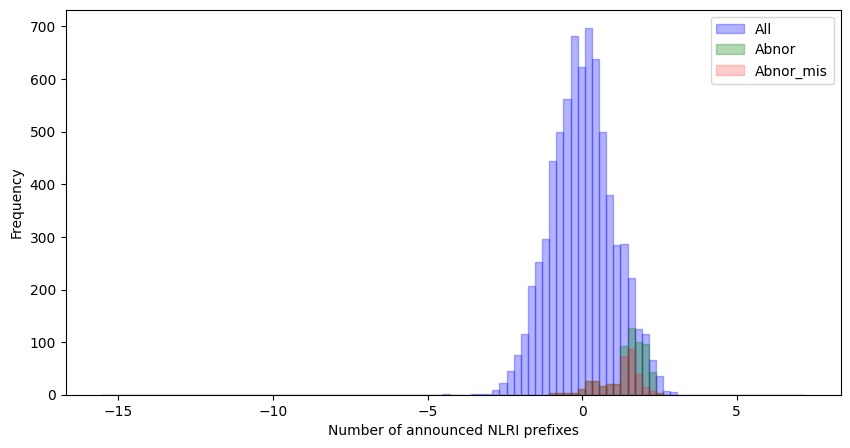

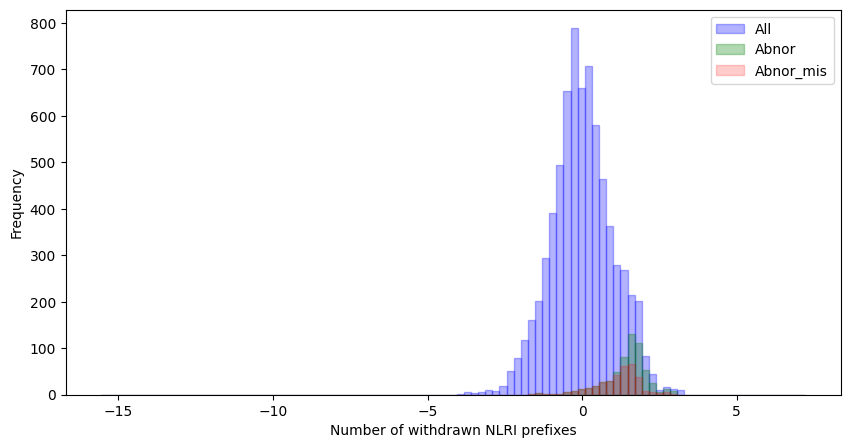

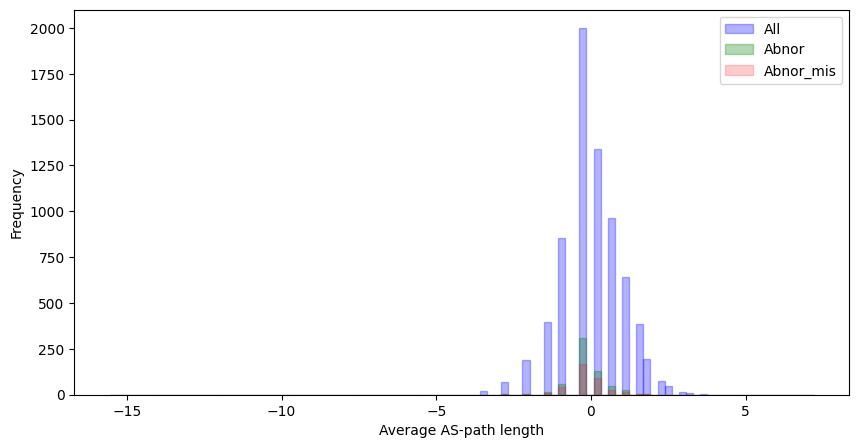

In [60]:

combo = {"train": ["Nimda", "Slammer"], "test": "Code_Red_I"}
y_pred = my_test(combo, time_span= time_span, slide_window= True, norm_type="Power")

X_nor_mis = Xp1[ (y1 != 1) & (y_pred == 1)]
X_abnor_mis = Xp1[ (y1 == 1) & (y_pred != 1)]

print("Nor_mis:", X_nor.shape, ":", X_nor_mis.shape)
print("Abnor_mis:",X_abnor_mis.shape,":", X_abnor_mis.shape)

my_compare_features( Xp1, X_abnor, X_abnor_mis, 5, legend_name=["All","Abnor","Abnor_mis"], density = False)




## 3.4 Normal vs Normal_mis

None
None
None
None
None


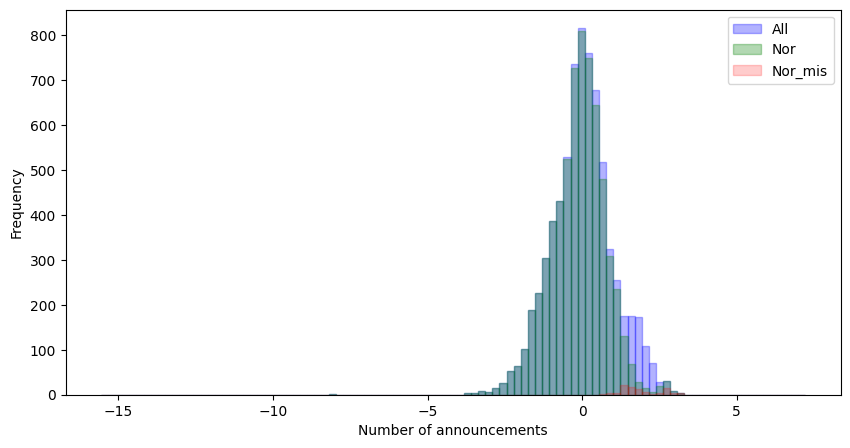

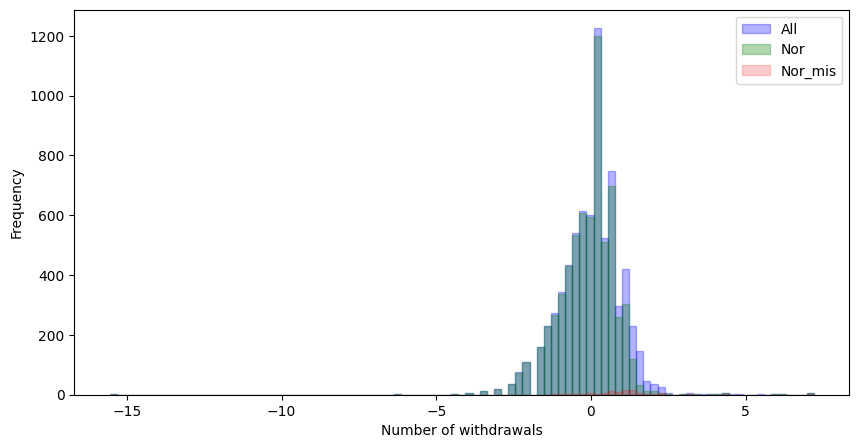

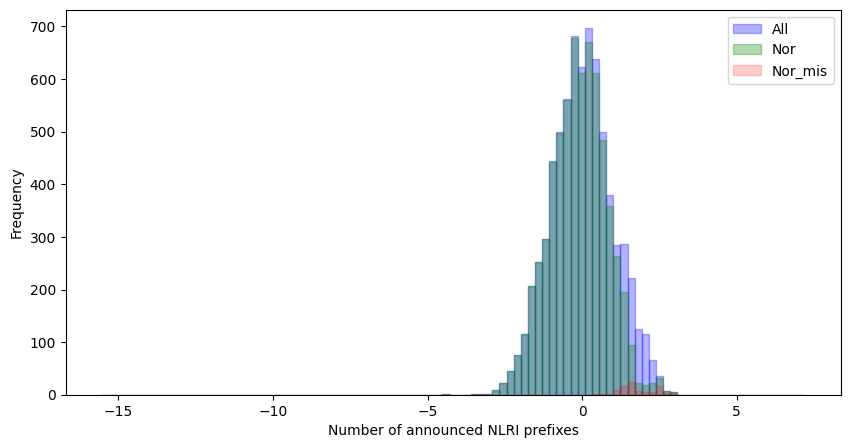

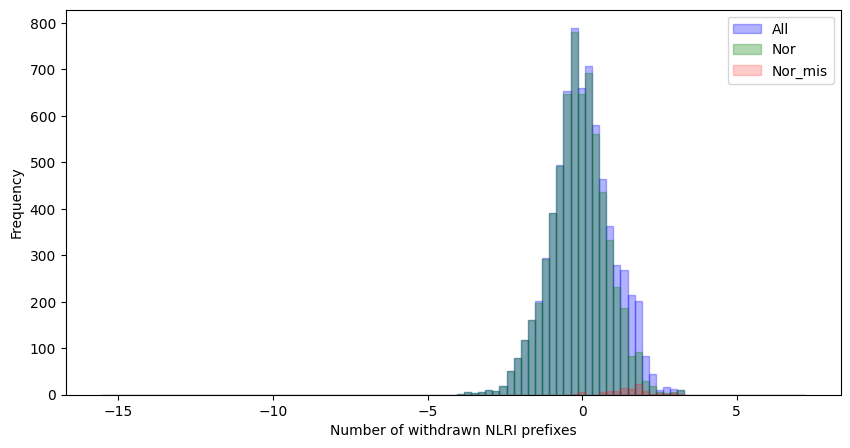

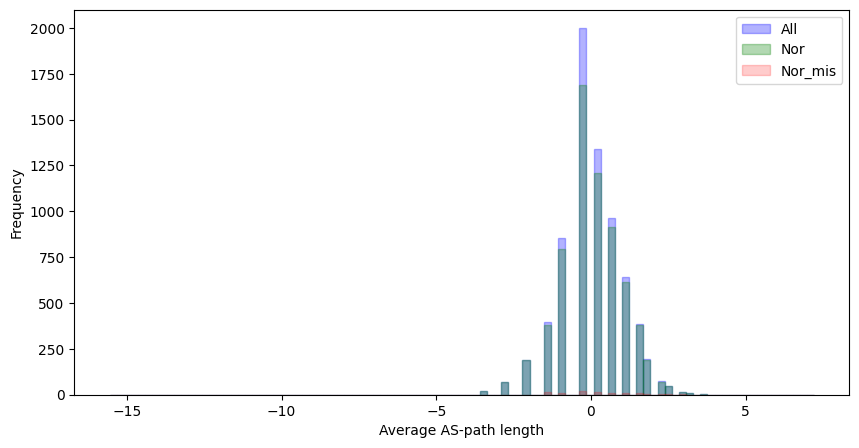

In [58]:
my_compare_features( Xp1, X_nor, X_nor_mis, 5, legend_name=["All","Nor","Nor_mis"], density = False)

## 3.5 Conclusion

* When the feature of abnormal and normal data overlaps, the data are easy to clasified as normal, which may be cause by the unbalanced data.
* For a lot of features, the abnormal data usually have a higher average value. For these features, if the normal data has a higher value, it's likely to classified as abnormal.
* The range of abnormal data features is usually with the normal data range, which means the abnormal data are not outliers.